Data Preprocessing

01. Primary Data Cleaning

In [186]:
#Importing the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import joblib
import re
import shap
import os

#Importing specific preprocessing, statistical and oversampling tools.

from IPython.display import HTML
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from matplotlib.colors import LinearSegmentedColormap
from imblearn.over_sampling import SMOTEN
from collections import Counter
from matplotlib.colors import ListedColormap

#Importing the tools necessary for Model Development

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#Importing the tools necessary for post Model Development Interpretations
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [187]:
# Loading the raw dataset collected via the survey in a csv format into a dataframe and displaying the first 10 rows.

AcademicDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/Final Year Project Datasets/Academic Performance Prediction Survey  (Responses).csv")
AcademicDataFrame.head(5)

,Timestamp,01. What was your age at the time of enrollment in your current degree program? (Select the appropriate range),02. What is your gender?,03. What type of syllabus and medium did you follow during your primary and secondary education? (Select the option that best applies to you),"04. Did you achieve a minimum 'C' pass in Mathematics, English, and Computing at your Ordinary Level (O-Level) examinations ?","If you selected ""No"" in the previous question, which subject(s) did you not achieve a minimum 'C' pass in or didn't undertake the above mentioned subjects?","05. Which stream did you study for your Advanced Level (A-Level) examination? (Select the option that best applies to you. If you did not pursue A/Ls, please specify in the ""Other"" section below.)",06. Did you achieve a minimum of three 'C' passes in your Advanced Level (A-Level) examination? (Please select the option that best matches your overall results.),"If you selected ""No"" in the previous question, which subject(s) did you not achieve a minimum 'C' pass in?",07. Did you follow A-Level English or complete an English course prior to starting your degree program?,...,18. What is the highest level of education attained by at least one of your parents or guardians? (Select the option that best applies to both parents or guardians),19. What is the current cohabitation status of your parents or guardians?,20. What is the average monthly household income of your family in Sri Lankan Rupees (LKR)?,21. What type of accommodation do you currently live in during your degree program?,22. What is your primary mode/s of transportation during your degree program to attend lectures and tutorials?,"23. On average, how much time do you spend traveling to attend your lectures and tutorials?","24. Were you employed during your 1st, 2nd, or 4th years of the degree program?","25. On average, how many hours per week do you spend on leisure activities? ( This includes going out with friends, vacations and similar activities.)","26. On average, how many hours per day do you spend on screen time unrelated to work or studies? (This includes activities such as browsing, social media, gaming, streaming, or watching TV.)",Score
0,1/23/2025 13:00:53,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"No, I did not follow A-Level English or any En...",...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours,NaN
1,1/23/2025 13:12:31,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"Yes, I studied A-Level English",...,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours,NaN
2,1/23/2025 13:17:32,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Computing,Commerce Stream,Yes,NaN,"Yes, I completed an English course",...,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours,NaN
3,1/23/2025 13:37:42,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Science Stream,No,"physics, chemistry, biology","Yes, I followed both A-Level English and compl...",...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,

Extracting and renaming attribute names for comprehension and convenience.

In [189]:
# Strip leading/trailing whitespace from all column names in the DataFrame.

AcademicDataFrame.columns = [col.strip() for col in AcademicDataFrame.columns]

In [190]:
# Using a 'For' loop to iterate through each column of the Academic DataFrame and output the column names with their corresponding index number.

for i, col in enumerate(AcademicDataFrame.columns):
    print(f"{i}: {col}")

0: Timestamp
1: 01. What was your age at the time of enrollment in your current degree program? (Select the appropriate range)
2: 02. What is your gender?
3: 03. What type of syllabus and medium did you follow during your primary and secondary education? (Select the option that best applies to you)
4: 04. Did you achieve a minimum 'C' pass in Mathematics, English, and Computing at your Ordinary Level (O-Level) examinations ?
5: If you selected "No" in the previous question,  which subject(s) did you not achieve a minimum 'C' pass in or didn't undertake the above mentioned subjects?
6: 05. Which stream did you study for your Advanced Level (A-Level) examination? (Select the option that best applies to you. If you did not pursue A/Ls, please specify in the "Other" section below.)
7: 06.  Did you achieve a minimum of three 'C' passes in your Advanced Level (A-Level) examination?  (Please select the option that best matches your overall results.)
8: If you selected "No" in the previous que

In [191]:
# Renaming complex column names to concise labels.

AcademicDataFrame.rename(columns={
    'Timestamp': 'Timestamp',
    '01. What was your age at the time of enrollment in your current degree program? (Select the appropriate range)': 'AgeAtEnrollment',
    '02. What is your gender?': 'Gender',
    '03. What type of syllabus and medium did you follow during your primary and secondary education? (Select the option that best applies to you)': 'SyllabusMedium',
    "04. Did you achieve a minimum 'C' pass in Mathematics, English, and Computing at your Ordinary Level (O-Level) examinations ?": 'OLevelCoreModulePass',
    'If you selected "No" in the previous question,  which subject(s) did you not achieve a minimum \'C\' pass in or didn\'t undertake the above mentioned subjects?': 'OLSubjectsBelowC',
    '05. Which stream did you study for your Advanced Level (A-Level) examination? (Select the option that best applies to you. If you did not pursue A/Ls, please specify in the "Other" section below.)': 'ALStream',
    '06.  Did you achieve a minimum of three \'C\' passes in your Advanced Level (A-Level) examination?  (Please select the option that best matches your overall results.)': 'ALevelMinimumPass',
    'If you selected "No" in the previous question,  which subject(s) did you not achieve a minimum \'C\' pass in?': 'ALSubjectsBelowC',
    '07. Did you follow A-Level English or complete an English course prior to starting your degree program?': 'ALEnglishOrCourse',
    '08. Did you pursue any higher education program prior to starting your current degree?': 'PriorHigherEdu',
    '09. In which year did you graduate from the Informatics Institute of Technology (IIT) Sri Lanka ?': 'GraduationYear',
    '10. What was your average percentage for your second year of studies? (Select the range that best reflects your average score)': 'SecondYearAvg',
    '11. Did you complete the recommended degree-related internship during your third year of studies that aligns with the career opportunities provided by your degree program?': 'InternshipCompleted',
    '12. After returning for your final year of studies, how would you rate your satisfaction with your degree program and your overall career path? Use the scale below to rate your satisfaction.': 'SatisfactionRating',
    '13. What was your final degree classification upon graduation?': 'FinalClassification',
    '14. How would you rate your overall stress and anxiety levels during your time in the degree program? (Use the scale below to rate your experience.)': 'StressAnxietyLevel',
    '15. How would you rate your overall physical health during your time in the degree program? Use the scale below to rate your experience.': 'PhysicalHealth',
    '16. Did you have any chronic illnesses that hindered your academic performance during your degree program? (For example, asthma, diabetes, etc.)': 'ChronicIllness',
    '17. What is the employment status of your parents or guardians?': 'ParentsEmployment',
    '18. What is the highest level of education attained by at least one of your parents or guardians? (Select the option that best applies to both parents or guardians)': 'ParentsEducation',
    '19. What is the current cohabitation status of your parents or guardians?': 'ParentsCohabitation',
    '20. What is the average monthly household income of your family in Sri Lankan Rupees (LKR)?': 'HouseholdIncome',
    '21. What type of accommodation do you currently live in during your degree program?': 'AccommodationType',
    '22. What is your primary mode/s of transportation during your degree program to attend lectures and tutorials?': 'TransportMode',
    '23. On average, how much time do you spend traveling to attend your lectures and tutorials?': 'TravelTime',
    '24.  Were you employed during your 1st, 2nd, or 4th years of the degree program?': 'EmployedDuringDegree',
    '25.  On average, how many hours per week do you spend on leisure activities? ( This includes going out with friends, vacations and similar activities.)': 'LeisureHoursPerWeek',
    '26. On average, how many hours per day do you spend on screen time unrelated to work or studies? (This includes activities such as browsing, social media, gaming, streaming, or watching TV.)': 'DailyScreenTime',
    'Score': 'Score'
}, inplace=True) #Replaces the new column names directly to the original Academic DataFrame without returning a new DataFrame.


In [192]:
# Using a 'For' loop to iterate through each column of the Academic DataFrame and output the column names with their corresponding index number to check whether the columns have been renamed correctly.

for i, col in enumerate(AcademicDataFrame.columns):
    print(f"{i}: {col}") # Print each column name with its index using enumerate (index, column name) for position tracking and f-string for formatted output.

0: Timestamp
1: AgeAtEnrollment
2: Gender
3: SyllabusMedium
4: OLevelCoreModulePass
5: OLSubjectsBelowC
6: ALStream
7: ALevelMinimumPass
8: ALSubjectsBelowC
9: ALEnglishOrCourse
10: PriorHigherEdu
11: GraduationYear
12: SecondYearAvg
13: InternshipCompleted
14: SatisfactionRating
15: FinalClassification
16: StressAnxietyLevel
17: PhysicalHealth
18: ChronicIllness
19: ParentsEmployment
20: ParentsEducation
21: ParentsCohabitation
22: HouseholdIncome
23: AccommodationType
24: TransportMode
25: TravelTime
26: EmployedDuringDegree
27: LeisureHoursPerWeek
28: DailyScreenTime
29: Score


Standardizing of Column names.

In [194]:
# Removing irrelevant attributes from the dataframe and displaying the column names with ther new corresponding index numbers.

AcademicDataFrame.drop(['Timestamp', 'Score'], axis=1, inplace=True) # Dropping the 'Timestamp' and 'Score' columns from the original DataFrame along the column axis.
for i, col in enumerate(AcademicDataFrame.columns):
    print(f"{i}: {col}") # Print each column name with its index using enumerate (index, column name) for position tracking and f-string for formatted output.

0: AgeAtEnrollment
1: Gender
2: SyllabusMedium
3: OLevelCoreModulePass
4: OLSubjectsBelowC
5: ALStream
6: ALevelMinimumPass
7: ALSubjectsBelowC
8: ALEnglishOrCourse
9: PriorHigherEdu
10: GraduationYear
11: SecondYearAvg
12: InternshipCompleted
13: SatisfactionRating
14: FinalClassification
15: StressAnxietyLevel
16: PhysicalHealth
17: ChronicIllness
18: ParentsEmployment
19: ParentsEducation
20: ParentsCohabitation
21: HouseholdIncome
22: AccommodationType
23: TransportMode
24: TravelTime
25: EmployedDuringDegree
26: LeisureHoursPerWeek
27: DailyScreenTime


In [195]:
# Removing Free Text attributes from the dataframe and displaying the column names with ther new corresponding index numbers.

AcademicDataFrame = AcademicDataFrame.drop(columns=['ALSubjectsBelowC', 'OLSubjectsBelowC'])

In [196]:
AcademicDataFrame.head(10)

,AgeAtEnrollment,Gender,SyllabusMedium,OLevelCoreModulePass,ALStream,ALevelMinimumPass,ALEnglishOrCourse,PriorHigherEdu,GraduationYear,SecondYearAvg,...,ParentsEmployment,ParentsEducation,ParentsCohabitation,HouseholdIncome,AccommodationType,TransportMode,TravelTime,EmployedDuringDegree,LeisureHoursPerWeek,DailyScreenTime
0,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",2024,Above 70%,...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours
1,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I studied A-Level English","No, I did not pursue any higher education prio...",2024,Above 70%,...,One parent/guardian is employed,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours
2,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Commerce Stream,Yes,"Yes, I completed an English course","No, I did not pursue any higher education prio...",2022,51% - 60%,...,One parent/guardian is employed,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours
3,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Science Stream,No,"Yes, I followed both A-Level English and compl...",Foundation Program / Diploma related to Inform...,2024,Above 70%,...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,More than 2 hours,"No, I was not employed",Less than 5 hours,8 – 10 hours
4,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I completed an English course",Foundation Program / Diploma related to Inform...,2024,61% - 70%,...,Both parents/guardians are employed,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Uber or other ride-hailing services,Less than 30 minutes,"Yes, part-time employment",05 – 10 hours,5 – 7 hours
5,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",Commerce Stream,Yes,"Yes, I followed both A-Level English and compl...",Foundation Program / Diploma related to Inform...,2021,Above 70%,...,Neither parents/guardian is employed,Completed A-Level,Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,5 – 7 hours
6,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Science Stream,No,"Yes, I studied A-Level English","No, I did not pursue any higher education prio...",2024,Above 70%,...,One parent/guardian is employed,Completed A-Level,Both parents/guardians live together,"Below LKR 100,000",Living with parents/guardians,Public bus / train,1.5 hours to 2 hours,"No, I was not employed",10 – 20 hours,5 – 7 hours
7,24 - 26 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I 

In [197]:
# Displaying the (number of rows, number of columns) to gain better comprehension of the DataFrame dimensions.

AcademicDataFrame.shape

(48, 26)

02. Data Imputation

In [199]:
# Display the columns with missing values and count of missing values.
MissingValues = AcademicDataFrame.isna().sum()

print("Values with missing values:")
print(MissingValues)

Values with missing values:
AgeAtEnrollment         0
Gender                  0
SyllabusMedium          0
OLevelCoreModulePass    0
ALStream                0
ALevelMinimumPass       3
ALEnglishOrCourse       0
PriorHigherEdu          0
GraduationYear          0
SecondYearAvg           0
InternshipCompleted     0
SatisfactionRating      0
FinalClassification     0
StressAnxietyLevel      0
PhysicalHealth          0
ChronicIllness          0
ParentsEmployment       0
ParentsEducation        0
ParentsCohabitation     0
HouseholdIncome         0
AccommodationType       0
TransportMode           0
TravelTime              0
EmployedDuringDegree    0
LeisureHoursPerWeek     0
DailyScreenTime         0
dtype: int64


In [200]:
# Define all columns (int or object/category) as categorical
AllCategoricalColumns = AcademicDataFrame.columns

# Fill all missing values with the mode (most frequent value)
for col in AllCategoricalColumns:
    ModeValue = AcademicDataFrame[col].mode()[0]
    AcademicDataFrame[col] = AcademicDataFrame[col].fillna(ModeValue)

AcademicDataFrame.head(5)

,AgeAtEnrollment,Gender,SyllabusMedium,OLevelCoreModulePass,ALStream,ALevelMinimumPass,ALEnglishOrCourse,PriorHigherEdu,GraduationYear,SecondYearAvg,...,ParentsEmployment,ParentsEducation,ParentsCohabitation,HouseholdIncome,AccommodationType,TransportMode,TravelTime,EmployedDuringDegree,LeisureHoursPerWeek,DailyScreenTime
0,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",2024,Above 70%,...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours
1,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I studied A-Level English","No, I did not pursue any higher education prio...",2024,Above 70%,...,One parent/guardian is employed,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours
2,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Commerce Stream,Yes,"Yes, I completed an English course","No, I did not pursue any higher education prio...",2022,51% - 60%,...,One parent/guardian is employed,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours
3,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Science Stream,No,"Yes, I followed both A-Level English and compl...",Foundation Program / Diploma related to Inform...,2024,Above 70%,...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,More than 2 hours,"No, I was not employed",Less than 5 hours,8 – 10 hours
4,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I completed an English course",Foundation Program / Diploma related to Inform...,2024,61% - 70%,...,Both parents/guardians are employed,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Uber or other ride-hailing services,Less than 30 minutes,"Yes, part-time employment",05 – 10 hours,5 – 7 hours


In [201]:
# Display the columns with missing values and count of missing values.
MissingValues = AcademicDataFrame.isna().sum()

print("Values with missing values:")
print(MissingValues)

Values with missing values:
AgeAtEnrollment         0
Gender                  0
SyllabusMedium          0
OLevelCoreModulePass    0
ALStream                0
ALevelMinimumPass       0
ALEnglishOrCourse       0
PriorHigherEdu          0
GraduationYear          0
SecondYearAvg           0
InternshipCompleted     0
SatisfactionRating      0
FinalClassification     0
StressAnxietyLevel      0
PhysicalHealth          0
ChronicIllness          0
ParentsEmployment       0
ParentsEducation        0
ParentsCohabitation     0
HouseholdIncome         0
AccommodationType       0
TransportMode           0
TravelTime              0
EmployedDuringDegree    0
LeisureHoursPerWeek     0
DailyScreenTime         0
dtype: int64


03. Standardizing of Free Text Responses

In [203]:
# Print for unique values and their counts for each column in the AcademicDataFrame.

for col in AcademicDataFrame.columns:
    unique_vals = AcademicDataFrame[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")


Column: AgeAtEnrollment
Unique values (4): ['18 - 20 years' '21 - 23 years' '24 - 26 years' '26 years and above']

Column: Gender
Unique values (2): ['Female' 'Male']

Column: SyllabusMedium
Unique values (5): ['Local Government Syllabus (Sri Lankan : English)'
 'Local Government Syllabus (Sri Lankan : Tamil)'
 'Local Government Syllabus (Sri Lankan : Sinhala)' 'Other'
 'Cambridge International (CIE) or Edexcel (Pearson)']

Column: OLevelCoreModulePass
Unique values (2): ["Yes, I achieved a minimum 'C' pass in all three subjects"
 "No, I did not achieve a minimum 'C' pass in one or more of these subjects"]

Column: ALStream
Unique values (8): ['Mathematics Stream' 'Commerce Stream' 'Science Stream' 'Skipped it AL'
 'Didnt do ALs' 'Technology Stream' "I didn't do A/Ls" 'Arts Stream']

Column: ALevelMinimumPass
Unique values (2): ['Yes' 'No']

Column: ALEnglishOrCourse
Unique values (4): ['No, I did not follow A-Level English or any English course'
 'Yes, I studied A-Level English' 'Yes

In [204]:
#Standardizing of free text responses.

AcademicDataFrame['ALStream'] = AcademicDataFrame['ALStream'].replace({
    'Skipped it AL': "Didn't take the A - Level examinations",
    'Didnt do ALs': "Didn't take the A - Level examinations",
    "I didn't do A/Ls": "Didn't take the A - Level examinations"
})

In [205]:
# Print for unique values and their counts for each column in the AcademicDataFrame for confirmation.

for col in AcademicDataFrame.columns:
    unique_vals = AcademicDataFrame[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")


Column: AgeAtEnrollment
Unique values (4): ['18 - 20 years' '21 - 23 years' '24 - 26 years' '26 years and above']

Column: Gender
Unique values (2): ['Female' 'Male']

Column: SyllabusMedium
Unique values (5): ['Local Government Syllabus (Sri Lankan : English)'
 'Local Government Syllabus (Sri Lankan : Tamil)'
 'Local Government Syllabus (Sri Lankan : Sinhala)' 'Other'
 'Cambridge International (CIE) or Edexcel (Pearson)']

Column: OLevelCoreModulePass
Unique values (2): ["Yes, I achieved a minimum 'C' pass in all three subjects"
 "No, I did not achieve a minimum 'C' pass in one or more of these subjects"]

Column: ALStream
Unique values (6): ['Mathematics Stream' 'Commerce Stream' 'Science Stream'
 "Didn't take the A - Level examinations" 'Technology Stream'
 'Arts Stream']

Column: ALevelMinimumPass
Unique values (2): ['Yes' 'No']

Column: ALEnglishOrCourse
Unique values (4): ['No, I did not follow A-Level English or any English course'
 'Yes, I studied A-Level English' 'Yes, I comp

In [206]:
for col in AcademicDataFrame.columns:
    print(f"Column: {col}, Data Type: {AcademicDataFrame[col].dtype}")

Column: AgeAtEnrollment, Data Type: object
Column: Gender, Data Type: object
Column: SyllabusMedium, Data Type: object
Column: OLevelCoreModulePass, Data Type: object
Column: ALStream, Data Type: object
Column: ALevelMinimumPass, Data Type: object
Column: ALEnglishOrCourse, Data Type: object
Column: PriorHigherEdu, Data Type: object
Column: GraduationYear, Data Type: int64
Column: SecondYearAvg, Data Type: object
Column: InternshipCompleted, Data Type: object
Column: SatisfactionRating, Data Type: int64
Column: FinalClassification, Data Type: object
Column: StressAnxietyLevel, Data Type: int64
Column: PhysicalHealth, Data Type: int64
Column: ChronicIllness, Data Type: object
Column: ParentsEmployment, Data Type: object
Column: ParentsEducation, Data Type: object
Column: ParentsCohabitation, Data Type: object
Column: HouseholdIncome, Data Type: object
Column: AccommodationType, Data Type: object
Column: TransportMode, Data Type: object
Column: TravelTime, Data Type: object
Column: Emplo

03. Exploratory Data Analysis

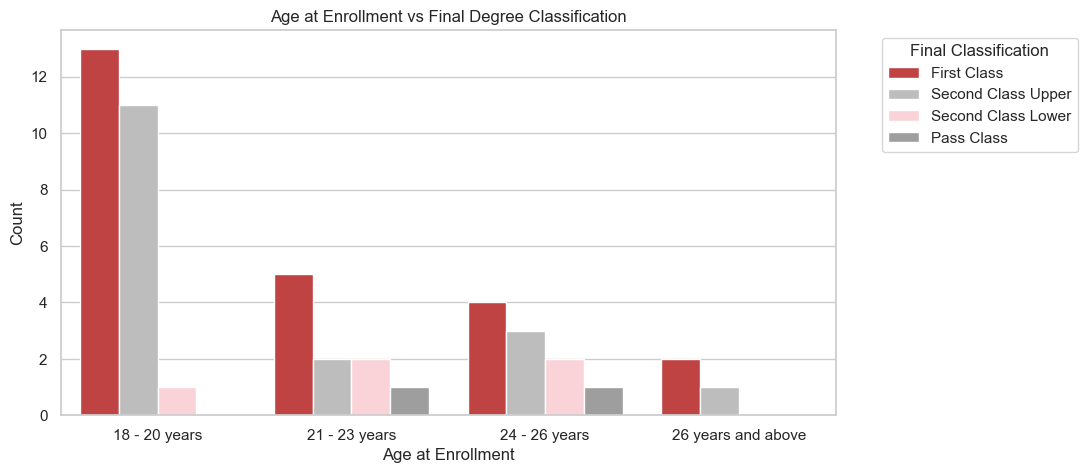

In [208]:
# Standardize the 'FinalClassification' column by stripping whitespace and converting to title case
# This ensures consistent values across plots and calculations
AcademicDataFrame['FinalClassification'] = AcademicDataFrame['FinalClassification'].str.strip().str.title()

# Age at Enrollment Relationship plot against FinalClassification
# This plot will show how age distribution varies across different final classifications

# Define a custom color palette for the classification groups
# The palette maps to the order of hue categories automatically assigned by seaborn
custom_palette = ['#D32F2F', '#BDBDBD', '#FFCDD2', '#9E9E9E']  # Red tones and neutrals

# Set the figure size for readability
plt.figure(figsize=(10, 5))

# Create a count plot to show frequency of each AgeAtEnrollment value, broken down by FinalClassification
sns.countplot(
    data=AcademicDataFrame,
    x='AgeAtEnrollment',
    hue='FinalClassification',
    palette=custom_palette
)

# Add plot title and axis labels for clarity
plt.title('Age at Enrollment vs Final Degree Classification')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')

# Position the legend outside the plot area for better layout
plt.legend(title='Final Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

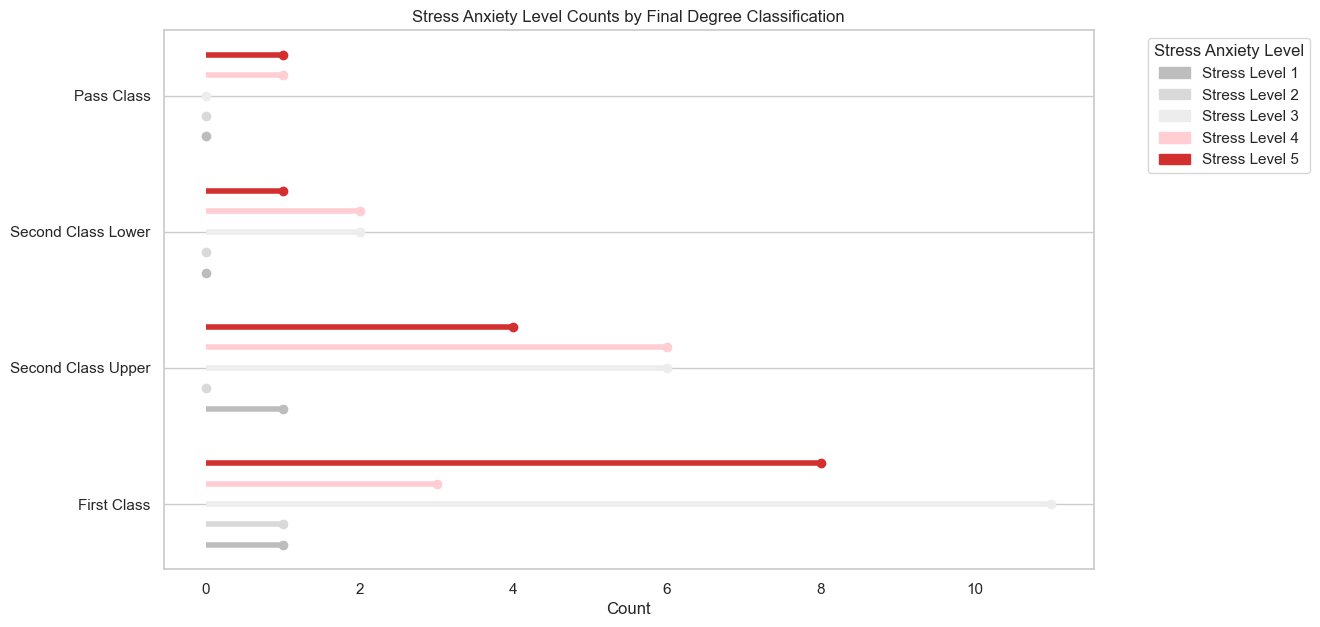

In [209]:
# Create a cross-tabulation of counts for FinalClassification vs StressAnxietyLevel
counts = pd.crosstab(AcademicDataFrame['FinalClassification'], AcademicDataFrame['StressAnxietyLevel'])

# Define the desired order for final classifications and stress levels
final_order = ['First Class', 'Second Class Upper', 'Second Class Lower', 'Pass Class']
stress_order = sorted(counts.columns.astype(int))  # Ensure numeric ordering of stress levels

# Reorder the DataFrame rows and columns to match desired structure
counts = counts.reindex(final_order)
counts = counts.reindex(columns=stress_order, fill_value=0)

# Set up the plot size
plt.figure(figsize=(12, 7))

# Establish fixed y positions for each classification
y_pos = np.arange(len(final_order))

# Define a consistent color map for each stress level (light to dark/red scale)
color_map = {
    1: '#BDBDBD',
    2: '#D9D9D9',
    3: '#EDEDED',
    4: '#FFCDD2',
    5: '#D32F2F'
}

# Plot horizontal lines and dots ("lollipops") for each stress level within each class
for i, stress_level in enumerate(stress_order):
    x = counts[stress_level]                               # X = count of each stress level per class
    y = y_pos + (i - 2) * 0.15                             # Slight vertical offset to avoid overlap
    plt.hlines(y, 0, x, color=color_map[stress_level], linewidth=4)
    plt.plot(x, y, 'o', color=color_map[stress_level])     # End dots at the count values

# Manually define legend handles using the same color mapping
legend_handles = [
    mpatches.Patch(color=color_map[stress], label=f'Stress Level {stress}')
    for stress in stress_order
]

# Set y-axis labels and main plot labels
plt.yticks(y_pos, final_order)
plt.xlabel('Count')
plt.title('Stress Anxiety Level Counts by Final Degree Classification')

# Position the legend to the right outside the plot area
plt.legend(handles=legend_handles, title='Stress Anxiety Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines along the x-axis to improve readability
plt.grid(axis='x')

# Display the full plot
plt.show()

C:\Users\Annmo\AppData\Local\Temp\ipykernel_6768\3269453503.py:39: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



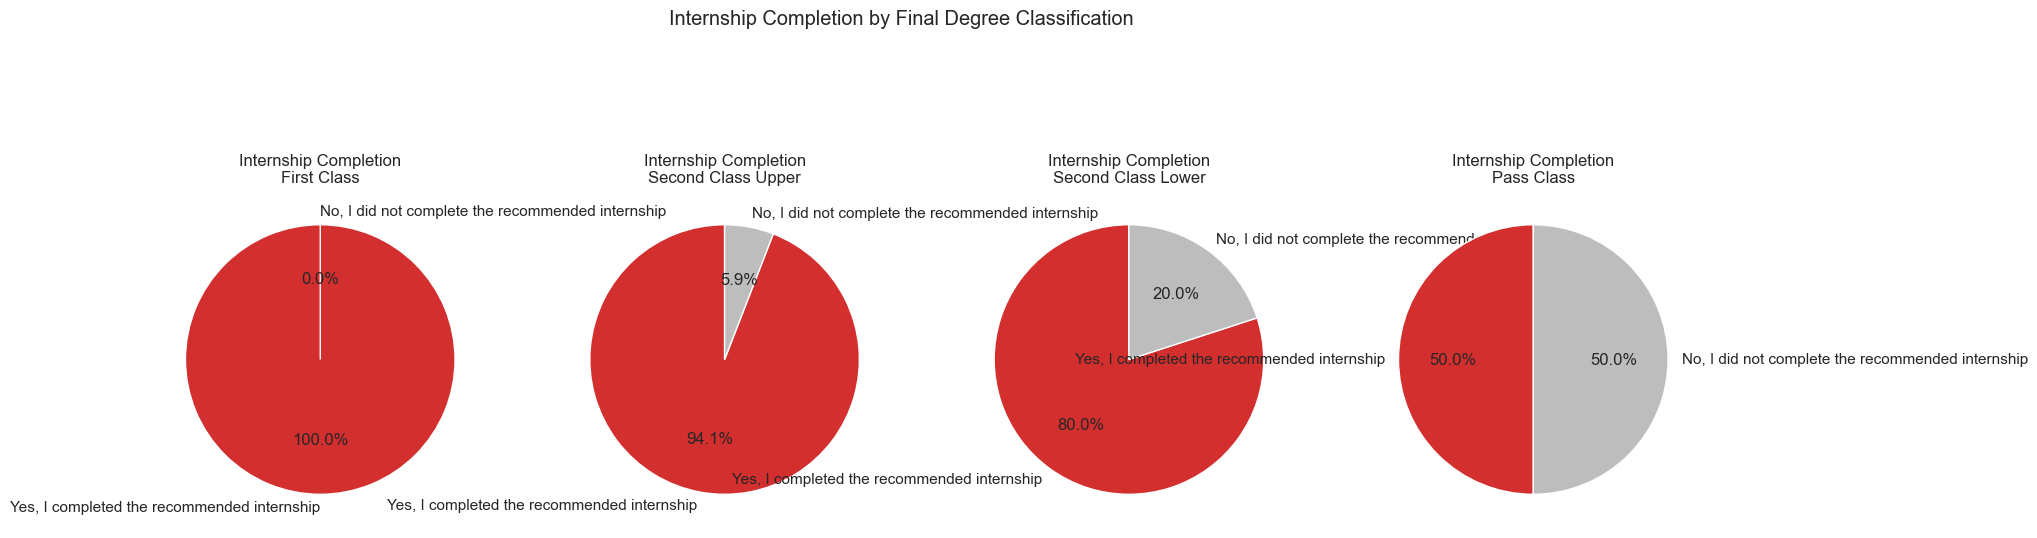

In [210]:
# Define colors for the pie chart slices
colors = ['#D32F2F', '#BDBDBD']  # Red for 'Yes', Grey for 'No'

# Define the final classification categories to iterate over
final_classes = ['First Class', 'Second Class Upper', 'Second Class Lower', 'Pass Class']

# Define the consistent labels for internship status (ensure alignment with data encoding)
labels = ['Yes, I completed the recommended internship', 'No, I did not complete the recommended internship']

# Create a row of 4 subplots (one for each classification group)
fig, axes = plt.subplots(1, 4, figsize=(20, 7))

# Loop over each classification group and associated subplot axis
for ax, fc in zip(axes, final_classes):
    # Filter the data to only include rows matching the current classification
    # Then count the internship completion responses
    data = AcademicDataFrame[AcademicDataFrame['FinalClassification'] == fc]['InternshipCompleted'].value_counts()
    
    # Ensure the expected labels are present and fill missing ones with zero
    data = data.reindex(labels, fill_value=0)
    
    # If there's no data for this class, hide the pie chart and mark it
    if data.sum() == 0:
        ax.axis('off')
        ax.set_title(f'{fc}\nNo data')
        continue

    # Convert values to integers for display and plotting
    data = data.astype(int)

    # Draw the pie chart with labels and percentages
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(f'Internship Completion\n{fc}')

# Add an overall title for the figure
plt.suptitle('Internship Completion by Final Degree Classification')

# Improve layout spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Leave room for suptitle

# Display the full chart
plt.show()

05. Synthetic Minority Over-sampling Technique for Nominal Features (SMOTEN)

In [212]:
print(AcademicDataFrame['FinalClassification'].value_counts())

FinalClassification
First Class           24
Second Class Upper    17
Second Class Lower     5
Pass Class             2
Name: count, dtype: int64


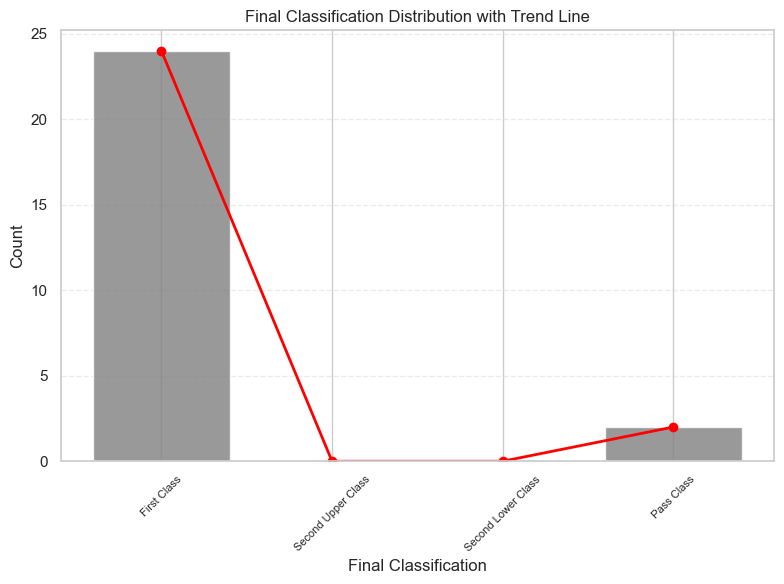

In [213]:
# Define the desired order for the final classification categories
classification_order = [
    'First Class',
    'Second Upper Class',
    'Second Lower Class',
    'Pass Class'
]

# Clean and standardize 'FinalClassification' values by stripping spaces and applying title case
# Then compute the frequency of each classification category
counts = AcademicDataFrame['FinalClassification'].str.strip().str.title().value_counts()

# Reindex the counts to follow the defined classification order
# Missing classes will appear as NaN and will be filled with 0
counts = counts.reindex(classification_order).fillna(0)

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot grey bars representing the count of students in each classification
ax.bar(counts.index, counts.values, color='grey', alpha=0.8)

# Overlay a red line to visualize the trend across classifications
ax.plot(counts.index, counts.values, color='red', marker='o', linewidth=2)

# Add title and axis labels
ax.set_title('Final Classification Distribution with Trend Line')
ax.set_xlabel('Final Classification')
ax.set_ylabel('Count')

# Improve readability of category labels
plt.xticks(rotation=45, fontsize=8)

# Add horizontal grid lines to the y-axis for better visual structure
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Ensure labels and layout do not overlap or get cut off
plt.tight_layout()

# Render the combined bar and line chart
plt.show()

In [214]:
# Feature-target split
X = AcademicDataFrame.drop('FinalClassification', axis=1)
y = AcademicDataFrame['FinalClassification']

print("Original class distribution:", Counter(y))

# Find smallest class size for k_neighbors
min_class_count = min(Counter(y).values())
k_neighbors = min_class_count - 1 if min_class_count > 1 else 1

# Identify categorical columns (object or category dtype)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# SMOTEN works only with categorical features, so if you have numerical features, either
# convert them to numeric or filter categorical only, but SMOTEN expects the full feature set with categorical columns

smote_en = SMOTEN(random_state=42, k_neighbors=k_neighbors)

X_resampled, y_resampled = smote_en.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({'First Class': 24, 'Second Class Upper': 17, 'Second Class Lower': 5, 'Pass Class': 2})
Resampled class distribution: Counter({'First Class': 24, 'Second Class Upper': 24, 'Second Class Lower': 24, 'Pass Class': 24})


In [215]:
# Combine X_resampled and y_resampled into a DataFrame
ResampledAcademicDataFrame = pd.DataFrame(X_resampled, columns=X.columns)
ResampledAcademicDataFrame['FinalClassification'] = y_resampled

ResampledAcademicDataFrame.shape

(96, 26)

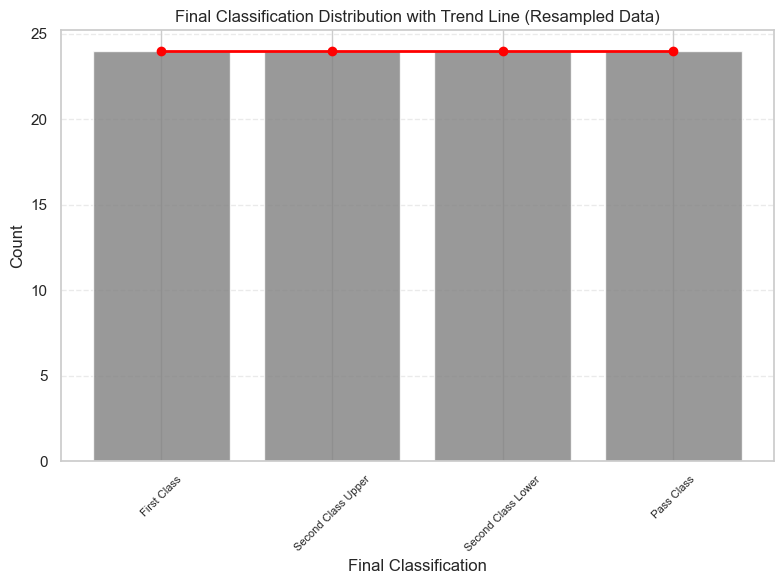

In [216]:
# Normalize and order categories
classification_order = [
    'First Class',
    'Second Upper Class',
    'Second Lower Class',
    'Pass Class'
]

counts = ResampledAcademicDataFrame['FinalClassification'].str.strip().str.title().value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

# Grey bars
ax.bar(counts.index, counts.values, color='grey', alpha=0.8)

# Red trend line (same values)
ax.plot(counts.index, counts.values, color='red', marker='o', linewidth=2)

# Labels and styling
ax.set_title('Final Classification Distribution with Trend Line (Resampled Data)')
ax.set_xlabel('Final Classification')
ax.set_ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [217]:
# Save to CSV file in Downloads folder
ResampledAcademicDataFrame.to_csv('C:/Users/Annmo/Downloads/resampled_academic_data.csv', index=False)

ResampledAcademicDataFrame

,AgeAtEnrollment,Gender,SyllabusMedium,OLevelCoreModulePass,ALStream,ALevelMinimumPass,ALEnglishOrCourse,PriorHigherEdu,GraduationYear,SecondYearAvg,...,ParentsEducation,ParentsCohabitation,HouseholdIncome,AccommodationType,TransportMode,TravelTime,EmployedDuringDegree,LeisureHoursPerWeek,DailyScreenTime,FinalClassification
0,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",2024,Above 70%,...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours,First Class
1,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I studied A-Level English","No, I did not pursue any higher education prio...",2024,Above 70%,...,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours,Second Class Upper
2,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Commerce Stream,Yes,"Yes, I completed an English course","No, I did not pursue any higher education prio...",2022,51% - 60%,...,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours,Second Class Upper
3,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",Science Stream,No,"Yes, I followed both A-Level English and compl...",Foundation Program / Diploma related to Inform...,2024,Above 70%,...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,More than 2 hours,"No, I was not employed",Less than 5 hours,8 – 10 hours,First Class
4,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"Yes, I completed an English course",Foundation Program / Diploma related to Inform...,2024,61% - 70%,...,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Uber or other ride-hailing services,Less than 30 minutes,"Yes, part-time employment",05 – 10 hours,5 – 7 hours,Second Class Upper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,18 - 20 years,Male,Cambridge International (CIE) or Edexcel (Pear...,"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",2024,61% - 70%,...,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,2 – 4 hours,Second Class Upper
92,18 - 20 years,Male,Cambridge International (CIE) or Edexcel (Pear...,"Yes, I achieved a minimum 'C' pass in all thre...",Mathematics Stream,Yes,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",2024,61% - 70%,...,Completed A-Level,Both parents/guardians live together,"Above LKR 500,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"No, I was not employed",05 – 10 hours,2 – 4 hours,Second Class Upper
93,18 - 20 years,Male,Local Government Syllabus (Sr

07. Categorical Feature Transformation

In [219]:
EncodedDataFrame = ResampledAcademicDataFrame.copy()

In [220]:
for col in EncodedDataFrame.columns:
    unique_vals = EncodedDataFrame[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")


Column: AgeAtEnrollment
Unique values (4): ['18 - 20 years' '21 - 23 years' '24 - 26 years' '26 years and above']

Column: Gender
Unique values (2): ['Female' 'Male']

Column: SyllabusMedium
Unique values (5): ['Local Government Syllabus (Sri Lankan : English)'
 'Local Government Syllabus (Sri Lankan : Tamil)'
 'Local Government Syllabus (Sri Lankan : Sinhala)' 'Other'
 'Cambridge International (CIE) or Edexcel (Pearson)']

Column: OLevelCoreModulePass
Unique values (2): ["Yes, I achieved a minimum 'C' pass in all three subjects"
 "No, I did not achieve a minimum 'C' pass in one or more of these subjects"]

Column: ALStream
Unique values (6): ['Mathematics Stream' 'Commerce Stream' 'Science Stream'
 "Didn't take the A - Level examinations" 'Technology Stream'
 'Arts Stream']

Column: ALevelMinimumPass
Unique values (2): ['Yes' 'No']

Column: ALEnglishOrCourse
Unique values (4): ['No, I did not follow A-Level English or any English course'
 'Yes, I studied A-Level English' 'Yes, I comp

In [221]:
# 01. AgeAtEnrollment - Ordinal Encoding
AgeAtEnrollmentMapping = {
    '18 - 20 years': 1,
    '21 - 23 years': 2,
    '24 - 26 years': 3,
    '26 years and above': 4
}
EncodedDataFrame['AgeAtEnrollment'] = EncodedDataFrame['AgeAtEnrollment'].map(AgeAtEnrollmentMapping)

# 02. Gender - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['Gender'], drop_first=False)

# 03. SyllabusMedium - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['SyllabusMedium'], drop_first=False)

# 04. OLevelCoreModulePass - Label Encoding
EncodedDataFrame['OLevelCoreModulePass'] = EncodedDataFrame['OLevelCoreModulePass'].map({
    "Yes, I achieved a minimum 'C' pass in all three subjects": 1,
    "No, I did not achieve a minimum 'C' pass in one or more of these subjects": 0
})

# 05. ALStream - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['ALStream'], drop_first=False)

# 06. ALevelCoreModulePass - Label Encoding
EncodedDataFrame['ALevelMinimumPass'] = EncodedDataFrame['ALevelMinimumPass'].map({'Yes': 1, 'No': 0})

# 07. ALEnglishOrCourse - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['ALEnglishOrCourse'], drop_first=False)

# 08. PriorHigherEdu - Label Encoding
EncodedDataFrame['PriorHigherEdu'] = EncodedDataFrame['PriorHigherEdu'].map({
    'No, I did not pursue any higher education prior to this degree': 0,
    'Foundation Program / Diploma related to Information Technology': 1
})

# 09. GraduationYear - Ordinal Encoding


# 10. SecondYearAvg - Ordinal Encoding
second_year_mapping = {
    'Below 40%': 1,
    '40% - 50%': 2,
    '51% - 60%': 3,
    '61% - 70%': 4,
    'Above 70%': 5
}
EncodedDataFrame['SecondYearAvg'] = EncodedDataFrame['SecondYearAvg'].map(second_year_mapping)

# 11. InternshipCompleted - Label Encoding
EncodedDataFrame['InternshipCompleted'] = EncodedDataFrame['InternshipCompleted'].map({
    'Yes, I completed the recommended internship': 1,
    'No, I did not complete the recommended internship': 0
})

# 12. SatisfactionRating - Ordinal Encoding
EncodedDataFrame['SatisfactionRating'] = EncodedDataFrame['SatisfactionRating'].astype('Int64')

# 13. FinalClassification - Ordinal Encoding
classification_mapping = {
    'Pass Class': 1,
    'Second Class Lower': 2,
    'Second Class Upper': 3,
    'First Class': 4
}
EncodedDataFrame['FinalClassification'] = EncodedDataFrame['FinalClassification'].map(classification_mapping)

# 14. StressAnxietyLevel - Ordinal Encoding
EncodedDataFrame['StressAnxietyLevel'] = EncodedDataFrame['StressAnxietyLevel'].astype('Int64')

# 15. PhysicalHealth - Ordinal Encoding
EncodedDataFrame['PhysicalHealth'] = EncodedDataFrame['PhysicalHealth'].astype('Int64')

# 16. ChronicIllness - Label Encoding
EncodedDataFrame['ChronicIllness'] = EncodedDataFrame['ChronicIllness'].map({'No': 0, 'Yes': 1})

# 17. ParentsEmployment - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['ParentsEmployment'], drop_first=False)

# 18. ParentsEducation - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['ParentsEducation'], drop_first=False)

# 19. ParentsCohabitation - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['ParentsCohabitation'], drop_first=False)

# 20. HouseholdIncome - Ordinal Encoding
income_mapping = {
    'Below LKR 100,000': 1,
    'LKR 100,000 - 300,000': 2,
    'LKR 300,000 - 500,000': 3,
    'Above LKR 500,000': 4,
    'Prefer not to say': 0
}
EncodedDataFrame['HouseholdIncome'] = EncodedDataFrame['HouseholdIncome'].map(income_mapping)

# 21. AccommodationType - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['AccommodationType'], drop_first=False)

# 22. TransportMode - Multi-Label Binarization
transport_modes = [
    'Driving / Driven by personal vehicle',
    'Uber or other ride-hailing services',
    'Public bus / train'
]
for mode in transport_modes:
    col_name = 'Transport_' + mode.replace(' / ', '_').replace(' ', '_').replace('-', '_').replace(',', '').replace('(', '').replace(')', '')
    EncodedDataFrame[col_name] = EncodedDataFrame['TransportMode'].apply(lambda x: int(mode in str(x)))
EncodedDataFrame = EncodedDataFrame.drop(columns=['TransportMode'])

# 23. TravelTime - Ordinal Encoding
travel_mapping = {
    'Less than 30 minutes': 1,
    '30 minutes to 1 hour': 2,
    '1 hour to 1.5 hours': 3,
    '1.5 hours to 2 hours': 4,
    'More than 2 hours': 5
}
EncodedDataFrame['TravelTime'] = EncodedDataFrame['TravelTime'].map(travel_mapping)

# 24. EmployedDuringDegree - One-Hot Encoding
EncodedDataFrame = pd.get_dummies(EncodedDataFrame, columns=['EmployedDuringDegree'], drop_first=False)

# 25. LeisureHoursPerWeek - Ordinal Encoding
leisure_mapping = {
    'Less than 5 hours': 1,
    '05 – 10 hours': 2,
    '10 – 20 hours': 3,
    'More than 20 hours': 4
}
EncodedDataFrame['LeisureHoursPerWeek'] = EncodedDataFrame['LeisureHoursPerWeek'].map(leisure_mapping)

# 26. DailyScreenTime - Ordinal Encoding
screen_mapping = {
    'Less than 2 hours': 1,
    '2 – 4 hours': 2,
    '5 – 7 hours': 3,
    '8 – 10 hours': 4,
    'More than 10 hours': 5
}
EncodedDataFrame['DailyScreenTime'] = EncodedDataFrame['DailyScreenTime'].map(screen_mapping)
EncodedDataFrame

,AgeAtEnrollment,OLevelCoreModulePass,ALevelMinimumPass,PriorHigherEdu,GraduationYear,SecondYearAvg,InternshipCompleted,SatisfactionRating,StressAnxietyLevel,PhysicalHealth,...,ParentsCohabitation_Parents/guardians are separated but living independently,AccommodationType_Living with parents/guardians,AccommodationType_Off-campus rented accommodation,AccommodationType_Shared accommodation with friends or relatives,Transport_Driving_Driven_by_personal_vehicle,Transport_Uber_or_other_ride_hailing_services,Transport_Public_bus_train,"EmployedDuringDegree_No, I was not employed","EmployedDuringDegree_Yes, full-time employment","EmployedDuringDegree_Yes, part-time employment"
0,1,1,1,0,2024,5,1,3,5,3,...,False,True,False,False,1,0,0,False,True,False
1,2,1,1,0,2024,5,1,5,5,4,...,False,True,False,False,0,0,1,True,False,False
2,3,0,1,0,2022,3,0,2,4,1,...,True,True,False,False,1,0,0,False,False,True
3,2,1,0,1,2024,5,1,2,5,2,...,False,True,False,False,0,0,1,True,False,False
4,1,1,1,1,2024,4,1,2,4,3,...,False,True,False,False,0,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,1,0,2024,4,1,4,3,4,...,False,True,False,False,1,0,0,True,False,False
92,1,1,1,0,2024,4,1,4,4,4,...,False,True,False,False,1,0,0,True,False,False
93,1,1,0,0,2022,4,1,4,3,3,...,False,True,False,False,0,0,1,True,False,False
94,1,1,1,0,2024,4,1,4,3,4,...,False,True,False,False,1,0,0,True,False,False


In [222]:
# Loop through all columns in the EncodedDataFrame to inspect data types and missing values
for idx, col in enumerate(EncodedDataFrame.columns):
    dtype = EncodedDataFrame[col].dtype                           # Get data type of the column
    missing = EncodedDataFrame[col].isna().sum()                  # Count number of missing (NaN) values
    
    # Print column index, name, data type, and number of missing values
    print(f"{idx}: {col} | dtype: {dtype} | missing values: {missing}")
    
    # If missing values exist, print the rows with NaNs for further inspection
    if missing > 0:
        print(f"NaN rows in {col}:")
        print(EncodedDataFrame[EncodedDataFrame[col].isna()][[col]])  # Show only rows where this column is NaN
        print("-" * 40)  # Separator for readability

0: AgeAtEnrollment | dtype: int64 | missing values: 0
1: OLevelCoreModulePass | dtype: int64 | missing values: 0
2: ALevelMinimumPass | dtype: int64 | missing values: 0
3: PriorHigherEdu | dtype: int64 | missing values: 0
4: GraduationYear | dtype: int64 | missing values: 0
5: SecondYearAvg | dtype: int64 | missing values: 0
6: InternshipCompleted | dtype: int64 | missing values: 0
7: SatisfactionRating | dtype: Int64 | missing values: 0
8: StressAnxietyLevel | dtype: Int64 | missing values: 0
9: PhysicalHealth | dtype: Int64 | missing values: 0
10: ChronicIllness | dtype: int64 | missing values: 0
11: HouseholdIncome | dtype: int64 | missing values: 0
12: TravelTime | dtype: int64 | missing values: 0
13: LeisureHoursPerWeek | dtype: int64 | missing values: 0
14: DailyScreenTime | dtype: int64 | missing values: 0
15: FinalClassification | dtype: int64 | missing values: 0
16: Gender_Female | dtype: bool | missing values: 0
17: Gender_Male | dtype: bool | missing values: 0
18: SyllabusMe

08. Merging Encoded Data Frame with Macroeconomic Contributors

In [224]:
# Load historical inflation (CPI-based) data for Sri Lanka
InflationDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/Final Year Project Datasets/Sri Lanka Inflation Rate (CPI) Data 1985 to 2024.csv")

# Convert the 'Year' column to datetime, then to a PeriodIndex with annual frequency
# This sets up the index for time series modeling
InflationDataFrame['Year'] = pd.to_datetime(InflationDataFrame['Year'], format='%Y')
InflationDataFrame.set_index(pd.PeriodIndex(InflationDataFrame['Year'], freq='Y'), inplace=True)

# Drop the original 'Year' column as it's now part of the index
InflationDataFrame.drop(columns='Year', inplace=True)

# Fit an Exponential Smoothing (ETS) model to the historical inflation rate
# Using an additive trend and no seasonality, suitable for non-seasonal macroeconomic data
model = ExponentialSmoothing(InflationDataFrame['Inflation Rate'], trend='add', seasonal=None)
model_fit = model.fit()

# Define the forecast period: 2025 to 2035
future_periods = pd.period_range(start='2025', end='2035', freq='Y')

# Generate forecast values using the fitted ETS model
forecast_values = model_fit.forecast(len(future_periods))

# Create a DataFrame from the forecasted inflation rates with appropriate index
forecast_df = pd.DataFrame({'Inflation Rate': forecast_values})
forecast_df.index = future_periods

# Combine historical and forecasted data into a single time series
full_data = pd.concat([InflationDataFrame, forecast_df])

# Convert the index from PeriodIndex to plain integer years for simpler indexing and analysis
full_data.index = full_data.index.year

# Helper function to safely extract scalar values for a given year
def get_single_value(df, year):
    if year in df.index:
        val = df.loc[year, 'Inflation Rate']
        return val.iloc[0] if isinstance(val, pd.Series) else val
    return np.nan  # Return NaN if the year does not exist

# Define a list of enrollment years (e.g., cohort entry years)
# Graduation year is assumed to be 4 years after enrollment
enrollment_years = list(range(2015, 2032))
results = []

# For each enrollment year, extract inflation at enrollment and graduation,
# then compute the percentage point change
for enroll_year in enrollment_years:
    grad_year = enroll_year + 4

    infl_enroll = get_single_value(full_data, enroll_year)
    infl_grad = get_single_value(full_data, grad_year)

    if pd.notna(infl_enroll) and pd.notna(infl_grad):
        change = infl_grad - infl_enroll
    else:
        change = np.nan  # Handle missing data gracefully

    results.append({
        'Enrollment Year': enroll_year,
        'Graduation Year': grad_year,
        'Inflation Rate at Enrollment Year': infl_enroll,
        'Inflation Rate at Graduation Year': infl_grad,
        'Inflation Rate Percentage Point Change': change
    })

# Create a final DataFrame to store the inflation rate change per student cohort
InflationRateDataFrame = pd.DataFrame(results)

# Show the first few rows to verify output
InflationRateDataFrame.head()

,Enrollment Year,Graduation Year,Inflation Rate at Enrollment Year,Inflation Rate at Graduation Year,Inflation Rate Percentage Point Change
0,2015,2019,3.77,3.53,-0.24
1,2016,2020,3.96,6.15,2.19
2,2017,2021,7.70,7.01,-0.69
3,2018,2022,2.14,49.72,47.58
4,2019,2023,3.53,16.54,13.01


In [225]:
# Load historical unemployment rate data for Sri Lanka
UnemploymentRateDataFrame = pd.read_csv(
    "C:/Users/Annmo/Downloads/Final Year Project Datasets/Sri Lanka Unemployment Rate Data 1985 to 2024.csv"
)

# Convert 'Year' column to datetime, then to PeriodIndex with annual frequency
# This prepares the data for time series forecasting
UnemploymentRateDataFrame['Year'] = pd.to_datetime(UnemploymentRateDataFrame['Year'], format='%Y')
UnemploymentRateDataFrame.set_index(pd.PeriodIndex(UnemploymentRateDataFrame['Year'], freq='Y'), inplace=True)
UnemploymentRateDataFrame.drop(columns='Year', inplace=True)

# Ensure the index has no duplicate years, keeping the first occurrence
UnemploymentRateDataFrame = UnemploymentRateDataFrame[~UnemploymentRateDataFrame.index.duplicated(keep='first')]

# Initialize and fit the ETS model with additive trend and no seasonality
# This suits non-seasonal economic indicators like unemployment rates
model = ExponentialSmoothing(UnemploymentRateDataFrame['Unemployment Rate'], trend='add', seasonal=None)
model_fit = model.fit()

# Define the forecast period: 2025 to 2035
future_periods = pd.period_range(start='2025', end='2035', freq='Y')

# Forecast unemployment rates for the future years
forecast_values = model_fit.forecast(len(future_periods))

# Build a DataFrame to store the forecasted values
forecast_df = pd.DataFrame({'Unemployment Rate': forecast_values})
forecast_df.index = future_periods

# Combine historical and forecasted data into one unified dataset
full_data = pd.concat([UnemploymentRateDataFrame, forecast_df])

# Convert the index from PeriodIndex to integer years for downstream calculations
full_data.index = full_data.index.year

# Remove any duplicate years if introduced during merging
full_data = full_data[~full_data.index.duplicated(keep='first')]

# Define a helper function to safely extract a scalar unemployment value for a given year
def get_single_value(df, year):
    if year in df.index:
        val = df.loc[year, 'Unemployment Rate']
        return val.iloc[0] if isinstance(val, pd.Series) else val
    return np.nan  # Return NaN if the year is not found

# Define the enrollment years (each graduation is assumed to occur 4 years after enrollment)
enrollment_years = list(range(2015, 2032))
results = []

# For each enrollment year, calculate unemployment rate at enrollment and graduation
# Then compute the percentage point change over that period
for enroll_year in enrollment_years:
    grad_year = enroll_year + 4

    unemp_enroll = get_single_value(full_data, enroll_year)
    unemp_grad = get_single_value(full_data, grad_year)

    if pd.notna(unemp_enroll) and pd.notna(unemp_grad):
        pct_point_change = unemp_grad - unemp_enroll
    else:
        pct_point_change = np.nan  # Gracefully handle missing years

    results.append({
        'Enrollment Year': enroll_year,
        'Graduation Year': grad_year,
        'Unemployment at Enrollment Year': unemp_enroll,
        'Unemployment at Graduation Year': unemp_grad,
        'Unemployment Rate Percentage Point Change': pct_point_change
    })

# Compile the results into a DataFrame for further analysis or merging
UnemploymentRateDataFrame = pd.DataFrame(results)

# Display the first few rows to validate the output
UnemploymentRateDataFrame.head()

,Enrollment Year,Graduation Year,Unemployment at Enrollment Year,Unemployment at Graduation Year,Unemployment Rate Percentage Point Change
0,2015,2019,4.52,4.67,0.15
1,2016,2020,4.24,5.36,1.12
2,2017,2021,4.05,4.98,0.93
3,2018,2022,4.32,4.53,0.21
4,2019,2023,4.67,6.00,1.33


In [226]:
# Load historical exchange rate data from CSV
ExchangeRateDataFrame = pd.read_csv(
    "C:/Users/Annmo/Downloads/Final Year Project Datasets/Sri Lanka Exchange Rate Data 1985 to 2024.csv"
)

# Convert the 'Year' column to datetime format, then to PeriodIndex with annual frequency
# This allows for time-series modeling at a yearly granularity
ExchangeRateDataFrame['Year'] = pd.to_datetime(ExchangeRateDataFrame['Year'], format='%Y')
ExchangeRateDataFrame.set_index(pd.PeriodIndex(ExchangeRateDataFrame['Year'], freq='Y'), inplace=True)

# Drop the original 'Year' column as it's now part of the index
ExchangeRateDataFrame.drop(columns='Year', inplace=True)

# Remove duplicate entries if any exist for the same year to ensure clean forecasting
ExchangeRateDataFrame = ExchangeRateDataFrame[~ExchangeRateDataFrame.index.duplicated(keep='first')]

# Initialize and fit an Exponential Smoothing model with an additive trend and no seasonality
# Suitable for non-seasonal, gradually changing time series like exchange rates
model = ExponentialSmoothing(ExchangeRateDataFrame['Exchange Rate'], trend='add', seasonal=None)
model_fit = model.fit()

# Generate future years from 2025 to 2035 for forecasting
future_years = pd.period_range(start='2025', end='2035', freq='Y')

# Forecast exchange rates for the future years
forecast_values = model_fit.forecast(len(future_years))

# Create a DataFrame to hold forecasted exchange rates
forecast_df = pd.DataFrame({'Exchange Rate': forecast_values}, index=future_years)

# Concatenate historical and forecasted data into a single DataFrame
full_data = pd.concat([ExchangeRateDataFrame, forecast_df])

# Convert the index from PeriodIndex to integer years for easier access
full_data.index = full_data.index.year
full_data = full_data[~full_data.index.duplicated(keep='first')]  # ensure no duplicate years

# Define a helper function to safely extract a single scalar value from the DataFrame
def get_single_value(df, year):
    if year in df.index:
        val = df.loc[year, 'Exchange Rate']
        return val.iloc[0] if isinstance(val, pd.Series) else val
    return np.nan  # Return NaN if year is not available

# Define a range of enrollment years and calculate graduation years
enrollment_years = list(range(2015, 2032))
results = []

# For each enrollment year, calculate the exchange rate at enrollment and graduation,
# then compute the percentage point change across the degree period
for enroll_year in enrollment_years:
    grad_year = enroll_year + 4
    
    rate_enroll = get_single_value(full_data, enroll_year)
    rate_grad = get_single_value(full_data, grad_year)
    
    if pd.notna(rate_enroll) and pd.notna(rate_grad):
        pct_point_change = rate_grad - rate_enroll
    else:
        pct_point_change = np.nan  # If data is missing, assign NaN
    
    results.append({
        'Enrollment Year': enroll_year,
        'Graduation Year': grad_year,
        'Exchange Rate at Enrollment Year': rate_enroll,
        'Exchange Rate at Graduation Year': rate_grad,
        'Exchange Rate Percentage Point Change': pct_point_change
    })

# Compile all records into a final DataFrame containing exchange rate change per cohort
ExchangeRateDataFrame = pd.DataFrame(results)

# Show the first few rows to verify output
ExchangeRateDataFrame.head()

,Enrollment Year,Graduation Year,Exchange Rate at Enrollment Year,Exchange Rate at Graduation Year,Exchange Rate Percentage Point Change
0,2015,2019,135.9378,178.7776,42.8398
1,2016,2020,145.6016,185.5238,39.9222
2,2017,2021,152.4575,200.4300,47.9725
3,2018,2022,162.5403,363.1100,200.5697
4,2019,2023,178.7776,323.9200,145.1424


In [227]:
# Preparing the Macroeconomic Data Frame

# Clean column names
InflationRateDataFrame.columns = InflationRateDataFrame.columns.str.strip()
UnemploymentRateDataFrame.columns = UnemploymentRateDataFrame.columns.str.strip()
ExchangeRateDataFrame.columns = ExchangeRateDataFrame.columns.str.strip()

# Select Enrollment Year and Graduation Year, plus point changes from each dataframe
inflation_df = InflationRateDataFrame[[
    "Enrollment Year",         
    "Graduation Year",
    "Inflation Rate Percentage Point Change"
]]

unemployment_df = UnemploymentRateDataFrame[[
    "Enrollment Year",         
    "Graduation Year",
    "Unemployment Rate Percentage Point Change"
]]

exchange_df = ExchangeRateDataFrame[[
    "Enrollment Year",         
    "Graduation Year",
    "Exchange Rate Percentage Point Change"
]]

# Merge on both Enrollment Year and Graduation Year to keep them intact
MacroEconomicDataFrame = inflation_df.merge(unemployment_df, on=["Enrollment Year", "Graduation Year"]) \
                                    .merge(exchange_df, on=["Enrollment Year", "Graduation Year"])


MacroEconomicDataFrame

,Enrollment Year,Graduation Year,Inflation Rate Percentage Point Change,Unemployment Rate Percentage Point Change,Exchange Rate Percentage Point Change
0,2015,2019,-0.240000,0.150000,42.839800
1,2016,2020,2.190000,1.120000,39.922200
2,2017,2021,-0.690000,0.930000,47.972500
3,2018,2022,47.580000,0.210000,200.569700
4,2019,2023,13.010000,1.330000,145.142400
5,2020,2024,-6.580000,-0.360000,116.146200
6,2021,2025,2.716422,-0.190258,116.112174
7,2022,2026,-39.998631,0.049483,-39.252752
8,2023,2027,-6.823684,-1.630775,7.252321
9,2024,2028,10.141264,-0.841034,36.817395


In [228]:
MacroEconomicDataFrame.to_csv("MacroEconomicDataFrame.csv", index=False)

# Define filename and path
filename = "MacroEconomicDataFrame.csv"
filepath = os.path.abspath(filename)

# Save the DataFrame
MacroEconomicDataFrame.to_csv(filepath, index=False)

# Display confirmation
print(f"File successfully saved as '{filename}' at: {filepath}")

File successfully saved as 'MacroEconomicDataFrame.csv' at: C:\Users\Annmo\Final Year Project\MacroEconomicDataFrame.csv


In [229]:
# Rename the 'GraduationYear' column in EncodedDataFrame to match the corresponding column in MacroEconomicDataFrame
# This ensures a proper join on a common key
EncodedDataFrame = EncodedDataFrame.rename(columns={'GraduationYear': 'Graduation Year'})

# Merge the encoded academic dataset with the macroeconomic dataset
# The join is done on the 'Graduation Year' column, linking each student with the macroeconomic conditions of their graduation year
# 'how="left"' ensures that all records from EncodedDataFrame are retained even if no match is found in MacroEconomicDataFrame
MergedDataFrame = pd.merge(
    EncodedDataFrame,
    MacroEconomicDataFrame,
    on='Graduation Year',
    how='left'
)

# Display the resulting merged dataset
MergedDataFrame

,AgeAtEnrollment,OLevelCoreModulePass,ALevelMinimumPass,PriorHigherEdu,Graduation Year,SecondYearAvg,InternshipCompleted,SatisfactionRating,StressAnxietyLevel,PhysicalHealth,...,Transport_Driving_Driven_by_personal_vehicle,Transport_Uber_or_other_ride_hailing_services,Transport_Public_bus_train,"EmployedDuringDegree_No, I was not employed","EmployedDuringDegree_Yes, full-time employment","EmployedDuringDegree_Yes, part-time employment",Enrollment Year,Inflation Rate Percentage Point Change,Unemployment Rate Percentage Point Change,Exchange Rate Percentage Point Change
0,1,1,1,0,2024,5,1,3,5,3,...,1,0,0,False,True,False,2020,-6.58,-0.36,116.1462
1,2,1,1,0,2024,5,1,5,5,4,...,0,0,1,True,False,False,2020,-6.58,-0.36,116.1462
2,3,0,1,0,2022,3,0,2,4,1,...,1,0,0,False,False,True,2018,47.58,0.21,200.5697
3,2,1,0,1,2024,5,1,2,5,2,...,0,0,1,True,False,False,2020,-6.58,-0.36,116.1462
4,1,1,1,1,2024,4,1,2,4,3,...,0,1,0,False,False,True,2020,-6.58,-0.36,116.1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,1,0,2024,4,1,4,3,4,...,1,0,0,True,False,False,2020,-6.58,-0.36,116.1462
92,1,1,1,0,2024,4,1,4,4,4,...,1,0,0,True,False,False,2020,-6.58,-0.36,116.1462
93,1,1,0,0,2022,4,1,4,3,3,...,0,0,1,True,False,False,2018,47.58,0.21,200.5697
94,1,1,1,0,2024,4,1,4,3,4,...,1,0,0,True,False,False,2020,-6.58,-0.36,116.1462


In [230]:
MergedDataFrame.columns

Index(['AgeAtEnrollment', 'OLevelCoreModulePass', 'ALevelMinimumPass',
       'PriorHigherEdu', 'Graduation Year', 'SecondYearAvg',
       'InternshipCompleted', 'SatisfactionRating', 'StressAnxietyLevel',
       'PhysicalHealth', 'ChronicIllness', 'HouseholdIncome', 'TravelTime',
       'LeisureHoursPerWeek', 'DailyScreenTime', 'FinalClassification',
       'Gender_Female', 'Gender_Male',
       'SyllabusMedium_Cambridge International (CIE) or Edexcel (Pearson)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : English)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : Sinhala)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : Tamil)',
       'SyllabusMedium_Other', 'ALStream_Arts Stream',
       'ALStream_Commerce Stream',
       'ALStream_Didn't take the A - Level examinations',
       'ALStream_Mathematics Stream', 'ALStream_Science Stream',
       'ALStream_Technology Stream',
       'ALEnglishOrCourse_No, I did not follow A-Level Englis

In [231]:
MergedDataFrame.drop(columns=['Enrollment Year'], inplace=True)

In [232]:
MergedDataFrame.columns

Index(['AgeAtEnrollment', 'OLevelCoreModulePass', 'ALevelMinimumPass',
       'PriorHigherEdu', 'Graduation Year', 'SecondYearAvg',
       'InternshipCompleted', 'SatisfactionRating', 'StressAnxietyLevel',
       'PhysicalHealth', 'ChronicIllness', 'HouseholdIncome', 'TravelTime',
       'LeisureHoursPerWeek', 'DailyScreenTime', 'FinalClassification',
       'Gender_Female', 'Gender_Male',
       'SyllabusMedium_Cambridge International (CIE) or Edexcel (Pearson)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : English)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : Sinhala)',
       'SyllabusMedium_Local Government Syllabus (Sri Lankan : Tamil)',
       'SyllabusMedium_Other', 'ALStream_Arts Stream',
       'ALStream_Commerce Stream',
       'ALStream_Didn't take the A - Level examinations',
       'ALStream_Mathematics Stream', 'ALStream_Science Stream',
       'ALStream_Technology Stream',
       'ALEnglishOrCourse_No, I did not follow A-Level Englis

In [233]:
# Post-JOIN missing value assessment and imputation around merging macroeconomic indicators using Graduation Year.

# Display the columns with missing values and count of missing values.
MissingValues = MergedDataFrame.isna().sum()

# Print results.
print("Values with missing values:")
print(MissingValues)

Values with missing values:
AgeAtEnrollment                                                                           0
OLevelCoreModulePass                                                                      0
ALevelMinimumPass                                                                         0
PriorHigherEdu                                                                            0
Graduation Year                                                                           0
SecondYearAvg                                                                             0
InternshipCompleted                                                                       0
SatisfactionRating                                                                        0
StressAnxietyLevel                                                                        0
PhysicalHealth                                                                            0
ChronicIllness                                      

In [234]:
len(MergedDataFrame.columns)

56

Data Validation

In [236]:
# Define the list of macroeconomic variables to test for statistical differences across classifications
MacroeconomicVariables = [
    'Inflation Rate Percentage Point Change',
    'Unemployment Rate Percentage Point Change',
    'Exchange Rate Percentage Point Change'
]

# Group the full dataset by the target variable 'FinalClassification'
# This allows comparing macroeconomic conditions across different outcome classes
GroupedByClassification = MergedDataFrame.groupby('FinalClassification')

# Initialize an empty list to collect ANOVA test results for each macroeconomic variable
AnovaResultsList = []

# Loop through each macroeconomic variable to test whether its mean differs across classes
for MacroVariable in MacroeconomicVariables:
    # Extract the values of the macro variable for each group of FinalClassification
    ClasswiseSamples = [Group[MacroVariable].values for ClassName, Group in GroupedByClassification]
    
    # Apply one-way ANOVA test (f_oneway) across the groups
    # This tests the null hypothesis that all group means are equal
    FStatistic, PValue = f_oneway(*ClasswiseSamples)
    
    # Append the test results to the list in dictionary form
    AnovaResultsList.append({
        'Macroeconomic Variable': MacroVariable,
        'F-Statistic': FStatistic,
        'p-Value': PValue
    })

# Convert the results list into a structured DataFrame for display and analysis
AnovaResultsDataFrame = pd.DataFrame(AnovaResultsList)

# Sort the results by p-value in ascending order to highlight the most statistically significant variables
AnovaResultsDataFrame = AnovaResultsDataFrame.sort_values(by='p-Value', ascending=True)

# Display the final ANOVA results DataFrame
AnovaResultsDataFrame

,Macroeconomic Variable,F-Statistic,p-Value
1,Unemployment Rate Percentage Point Change,19.405250,7.833711e-10
0,Inflation Rate Percentage Point Change,3.184718,2.750244e-02
2,Exchange Rate Percentage Point Change,2.993399,3.488075e-02


C:\Users\Annmo\AppData\Local\Temp\ipykernel_6768\1722406307.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




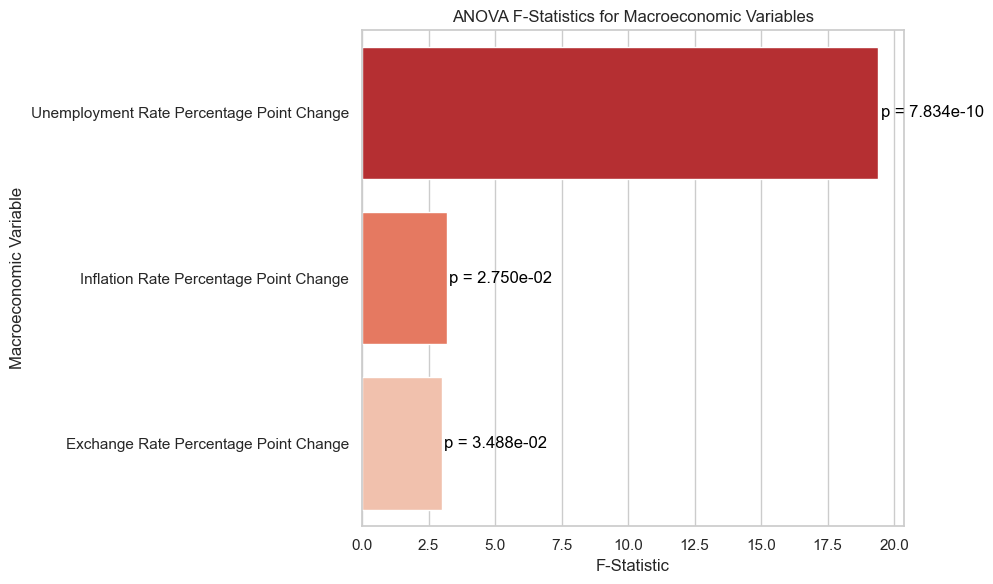

In [237]:
# Set plot style
sns.set(style="whitegrid")

# Reset index so enumeration matches visual bar positions
AnovaResultsDataFrame = AnovaResultsDataFrame.reset_index(drop=True)

# Preserve the correct order of macroeconomic variables
macro_order = AnovaResultsDataFrame['Macroeconomic Variable'].tolist()

# Prepare the figure and axis
plt.figure(figsize=(10, 6))

# Bar plot with fixed y-axis order to match DataFrame
barplot = sns.barplot(
    x='F-Statistic',
    y='Macroeconomic Variable',
    data=AnovaResultsDataFrame,
    order=macro_order,
    palette='Reds_r'
)

# Annotate p-values on bars in correct vertical order
for i, row in AnovaResultsDataFrame.iterrows():
    barplot.text(
        row['F-Statistic'] + 0.1,
        i,
        f"p = {row['p-Value']:.3e}",
        color='black',
        va='center'
    )

# Titles and labels
plt.title('ANOVA F-Statistics for Macroeconomic Variables')
plt.xlabel('F-Statistic')
plt.ylabel('Macroeconomic Variable')

plt.tight_layout()
plt.show()

02. Correlation Analysis & Heatmap Computation

In [239]:
# Calculate the correlation matrix from the full dataset
FullCorrelationMatrix = MergedDataFrame.corr()

# Extract correlations with the target variable only
FinalClassificationCorrelations = FullCorrelationMatrix["FinalClassification"].drop("FinalClassification")

# Create a new DataFrame to store variable names and their correlation values
CorrelationTable = pd.DataFrame({
    "Variable": FinalClassificationCorrelations.index,
    "CorrelationWithFinalClassification": FinalClassificationCorrelations.values
})

# Compute absolute correlation values for sorting, but keep original signed values
CorrelationTable["AbsoluteValue"] = CorrelationTable["CorrelationWithFinalClassification"].abs()

# Sort by absolute strength (strongest to weakest)
CorrelationTable.sort_values(by="AbsoluteValue", ascending=False, inplace=True)

# Drop the helper column
CorrelationTable.drop(columns=["AbsoluteValue"], inplace=True)

# Reset index for clean display
CorrelationTable.reset_index(drop=True, inplace=True)

# Display final result
CorrelationTable

,Variable,CorrelationWithFinalClassification
0,SecondYearAvg,8.280893e-01
1,PhysicalHealth,7.787840e-01
2,InternshipCompleted,7.379281e-01
3,SatisfactionRating,6.988092e-01
4,ParentsEducation_Higher education (Diploma or ...,5.541889e-01
5,ParentsEducation_Postgraduate education (Maste...,-5.336344e-01
6,Transport_Driving_Driven_by_personal_vehicle,-5.027142e-01
7,TravelTime,-4.943648e-01
8,"ALEnglishOrCourse_Yes, I studied A-Level English",4.869747e-01
9,"ALEnglishOrCourse_No, I did not follow A-Level...",-4.849025e-01


In [240]:
# Step 1: Compute correlation matrix
corr_matrix = MergedDataFrame.corr()

# Step 2: Generate interactive heatmap
fig = px.imshow(
    corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    text_auto=".2f",  # Keep grid cells formatted to 2 decimals
    color_continuous_scale=["#BDBDBD", "#D32F2F"],
    aspect="auto",
    title="Interactive Correlation Heatmap"
)

# Step 2.5: Show full precision in tooltip
fig.update_traces(
    hovertemplate="X: %{x}<br>Y: %{y}<br>Correlation: %{z}<extra></extra>"
)

# Step 3: Layout adjustments
fig.update_layout(
    width=2000,
    height=2000,
    margin=dict(l=200, r=200, t=100, b=100),
    xaxis_tickangle=45,
    xaxis_side="bottom"
)

# Step 4: Export to HTML
fig.write_html("correlation_heatmap.html")

# Step 5: Show clickable link
HTML('<a href="correlation_heatmap.html" target="_blank">Click here to view the interactive correlation heatmap</a>')

03. Chi-Square Procedure

In [242]:
OneHotEncodedAttributes = [
    # 01. Gender
    'Gender_Female',
    'Gender_Male',
    'Other',

    # 02. SyllabusMedium
    'SyllabusMedium_Cambridge International (CIE) or Edexcel (Pearson)',
    'SyllabusMedium_Local Government Syllabus (Sri Lankan : English)',
    'SyllabusMedium_Local Government Syllabus (Sri Lankan : Sinhala)',
    'SyllabusMedium_Local Government Syllabus (Sri Lankan : Tamil)',
    'SyllabusMedium_Other',

    # 03. ALStream
    'ALStream_Arts Stream',
    'ALStream_Commerce Stream',
    "ALStream_I didn't do A/Ls",
    'ALStream_Mathematics Stream',
    'ALStream_Science Stream',
    'ALStream_Technology Stream',

    # 04. ALEnglishOrCourse
    'ALEnglishOrCourse_No, I did not follow A-Level English or any English course',
    'ALEnglishOrCourse_Yes, I completed an English course',
    'ALEnglishOrCourse_Yes, I followed both A-Level English and completed an English course',
    'ALEnglishOrCourse_Yes, I studied A-Level English',

    # 05. ParentsEmployment
    'ParentsEmployment_Both parents/guardians are employed',
    'ParentsEmployment_Neither parents/guardian is employed',
    'ParentsEmployment_One parent/guardian is employed',

    # 06. ParentsEducation
    'ParentsEducation_Completed A-Level',
    'ParentsEducation_Completed O-Level',
    "ParentsEducation_Higher education (Diploma or Bachelor's degree)",
    "ParentsEducation_Postgraduate education (Master's degree or higher)",
    'ParentsEducation_Prefer not to say',

    # 07. ParentsCohabitation
    'ParentsCohabitation_Both parents/guardians are deceased',
    'ParentsCohabitation_Both parents/guardians live together',
    'ParentsCohabitation_Parents/guardians are separated but living independently',

    # 08. AccommodationType
    'AccommodationType_Living with parents/guardians',
    'AccommodationType_Off-campus rented accommodation',
    'AccommodationType_Shared accommodation with friends or relatives',

    # 09. EmployedDuringDegree
    'EmployedDuringDegree_No, I was not employed',
    'EmployedDuringDegree_Yes, full-time employment',
    'EmployedDuringDegree_Yes, part-time employment'
]

target_variable = "FinalClassification"

# Check if target variable exists
if target_variable not in EncodedDataFrame.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in dataframe columns.")

# Filter to keep only columns that exist in the dataframe
existing_columns = [col for col in OneHotEncodedAttributes if col in EncodedDataFrame.columns]

results = {}
for attr in existing_columns:
    # Create contingency table between one-hot encoded attribute and target variable
    contingency_table = pd.crosstab(EncodedDataFrame[attr], EncodedDataFrame[target_variable])

    # Run chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    results[attr] = {'chi2_statistic': chi2, 'p_value': p}

# Convert results to DataFrame and sort by p-value ascending
# Convert results to DataFrame and round values to 10 decimal places
results_df = pd.DataFrame(results).T.round({'chi2_statistic': 10, 'p_value': 10}).sort_values('p_value')

results_df

,chi2_statistic,p_value
ParentsEducation_Postgraduate education (Master's degree or higher),57.375000,0.000000e+00
SyllabusMedium_Local Government Syllabus (Sri Lankan : English),49.333333,1.000000e-10
SyllabusMedium_Cambridge International (CIE) or Edexcel (Pearson),34.813187,1.334000e-07
ParentsEducation_Higher education (Diploma or Bachelor's degree),32.786241,3.573000e-07
ParentsEducation_Completed A-Level,32.000000,5.233000e-07
"ALEnglishOrCourse_No, I did not follow A-Level English or any English course",30.886957,8.979000e-07
"ALEnglishOrCourse_Yes, I studied A-Level English",27.362319,4.942500e-06
"ALEnglishOrCourse_Yes, I completed an English course",21.373045,8.807040e-05
ALStream_Mathematics Stream,16.354092,9.593340e-04
ParentsEmployment_Both parents/guardians are employed,16.212524,1.025701e-03


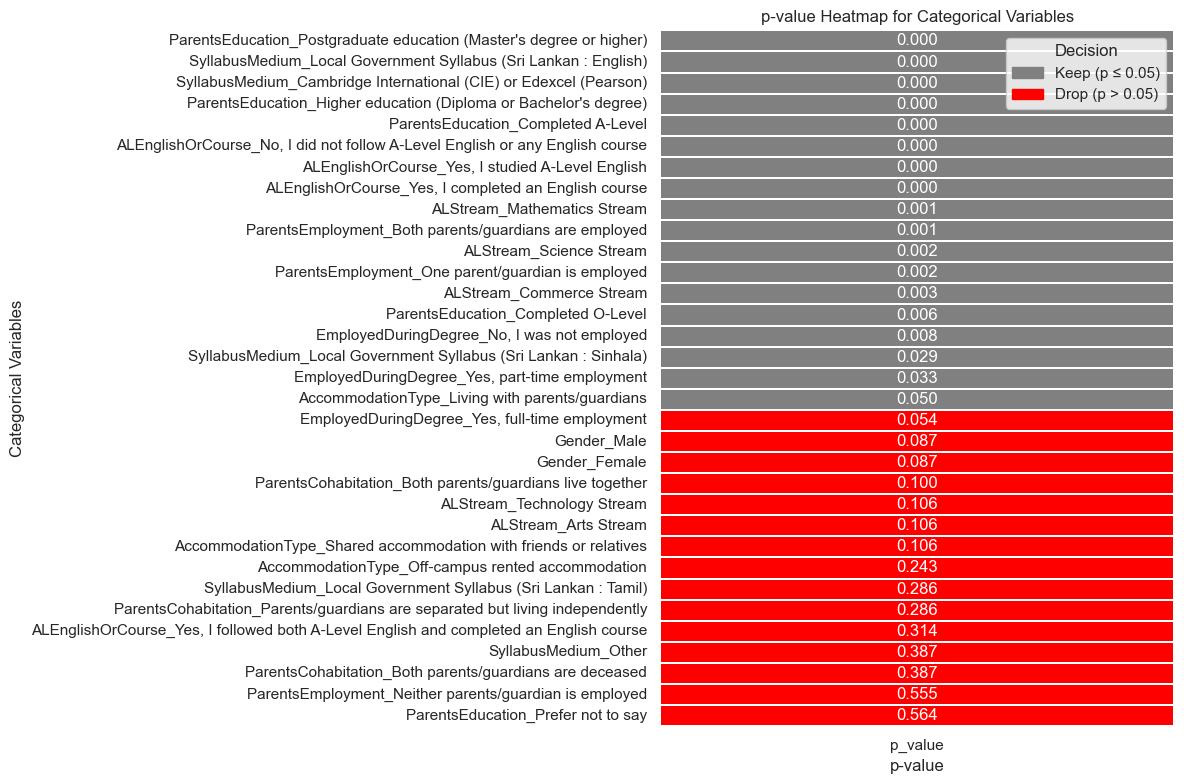

In [243]:
# Binary mask for coloring: 0 for keep, 1 for drop
color_mask = results_df['p_value'].apply(lambda p: 0 if p <= 0.05 else 1)

# Prepare DataFrame for heatmap: values are 0 or 1 for colors
heatmap_data = pd.DataFrame(color_mask, columns=['p_value'])

plt.figure(figsize=(12, 8))

# Two color colormap: green for 0, red for 1
cmap = ListedColormap(['grey', 'red'])

# Plot heatmap with binary color data
ax = sns.heatmap(
    heatmap_data,
    annot=results_df[['p_value']].round(3),  # Show actual p-values as annotations
    fmt='.3f',
    cmap=cmap,
    cbar=False,
    linewidths=0.05,
    linecolor='white'
)

# Custom legend patches
import matplotlib.patches as mpatches
keep_patch = mpatches.Patch(color='grey', label='Keep (p ≤ 0.05)')
drop_patch = mpatches.Patch(color='red', label='Drop (p > 0.05)')
plt.legend(handles=[keep_patch, drop_patch], loc='upper right', title='Decision')

plt.title('p-value Heatmap for Categorical Variables')
plt.ylabel('Categorical Variables')
plt.xlabel('p-value')

plt.tight_layout()
plt.show()

In [244]:
# Assuming results_df is your DataFrame with 'p_value' column
insignificant_vars = results_df[results_df['p_value'] > 0.05]

print("Variables with p-value greater than 0.05 (consider dropping):")
print(insignificant_vars.index.tolist())

Variables with p-value greater than 0.05 (consider dropping):
['EmployedDuringDegree_Yes, full-time employment', 'Gender_Male', 'Gender_Female', 'ParentsCohabitation_Both parents/guardians live together', 'ALStream_Technology Stream', 'ALStream_Arts Stream', 'AccommodationType_Shared accommodation with friends or relatives', 'AccommodationType_Off-campus rented accommodation', 'SyllabusMedium_Local Government Syllabus (Sri Lankan : Tamil)', 'ParentsCohabitation_Parents/guardians are separated but living independently', 'ALEnglishOrCourse_Yes, I followed both A-Level English and completed an English course', 'SyllabusMedium_Other', 'ParentsCohabitation_Both parents/guardians are deceased', 'ParentsEmployment_Neither parents/guardian is employed', 'ParentsEducation_Prefer not to say']


In [245]:
#Removing a few of the Chi-Sqaure suggested columns

#List of columns to drop based on p-value > 0.05
ColumnsToDrop = [ 'Gender_Female', 'Gender_Male']
#Create new dataframe with selected columns dropped
FeatureSelectedDataFrame = MergedDataFrame.drop(columns=ColumnsToDrop)

FeatureSelectedDataFrame

,AgeAtEnrollment,OLevelCoreModulePass,ALevelMinimumPass,PriorHigherEdu,Graduation Year,SecondYearAvg,InternshipCompleted,SatisfactionRating,StressAnxietyLevel,PhysicalHealth,...,AccommodationType_Shared accommodation with friends or relatives,Transport_Driving_Driven_by_personal_vehicle,Transport_Uber_or_other_ride_hailing_services,Transport_Public_bus_train,"EmployedDuringDegree_No, I was not employed","EmployedDuringDegree_Yes, full-time employment","EmployedDuringDegree_Yes, part-time employment",Inflation Rate Percentage Point Change,Unemployment Rate Percentage Point Change,Exchange Rate Percentage Point Change
0,1,1,1,0,2024,5,1,3,5,3,...,False,1,0,0,False,True,False,-6.58,-0.36,116.1462
1,2,1,1,0,2024,5,1,5,5,4,...,False,0,0,1,True,False,False,-6.58,-0.36,116.1462
2,3,0,1,0,2022,3,0,2,4,1,...,False,1,0,0,False,False,True,47.58,0.21,200.5697
3,2,1,0,1,2024,5,1,2,5,2,...,False,0,0,1,True,False,False,-6.58,-0.36,116.1462
4,1,1,1,1,2024,4,1,2,4,3,...,False,0,1,0,False,False,True,-6.58,-0.36,116.1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,1,0,2024,4,1,4,3,4,...,False,1,0,0,True,False,False,-6.58,-0.36,116.1462
92,1,1,1,0,2024,4,1,4,4,4,...,False,1,0,0,True,False,False,-6.58,-0.36,116.1462
93,1,1,0,0,2022,4,1,4,3,3,...,False,0,0,1,True,False,False,47.58,0.21,200.5697
94,1,1,1,0,2024,4,1,4,3,4,...,False,1,0,0,True,False,False,-6.58,-0.36,116.1462


In [246]:
# Save to CSV file
FeatureSelectedDataFrame.to_csv('C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv', index=False)

04. Mutual Information Score Analysis

In [248]:
# Create a copy of the original DataFrame to preserve the input data
MISeriesDataFrame = FeatureSelectedDataFrame.copy()

# Separate the independent variables (features) and the dependent variable (target)
X = MISeriesDataFrame.drop(columns=['FinalClassification'])  # All columns except the target
y = MISeriesDataFrame['FinalClassification']                 # Target variable

# Compute mutual information (MI) scores for each feature relative to the target, discrete_features='auto' automatically detects which features are categorical
# random_state ensures reproducibility of the MI score computation
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

# Create a Pandas Series to map features to their MI scores
# Then sort the series in ascending order for ranked display
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series_sorted = mi_series.sort_values(ascending=True)

# Print the sorted mutual information scores with index numbers
# This helps identify which features are most and least informative for the target variable
for i, (feature, score) in enumerate(mi_series_sorted.items(), start=1):
    print(f"{i}. {feature}: {score:.4f}")

1. SyllabusMedium_Other: 0.0000
2. AccommodationType_Living with parents/guardians: 0.0000
3. AccommodationType_Shared accommodation with friends or relatives: 0.0000
4. ChronicIllness: 0.0000
5. SyllabusMedium_Local Government Syllabus (Sri Lankan : Tamil): 0.0000
6. ALStream_Technology Stream: 0.0000
7. ParentsCohabitation_Both parents/guardians are deceased: 0.0000
8. EmployedDuringDegree_Yes, part-time employment: 0.0000
9. ParentsEducation_Prefer not to say: 0.0000
10. ParentsEducation_Completed O-Level: 0.0092
11. EmployedDuringDegree_No, I was not employed: 0.0113
12. ALStream_Science Stream: 0.0182
13. ParentsCohabitation_Parents/guardians are separated but living independently: 0.0286
14. ALStream_Commerce Stream: 0.0286
15. EmployedDuringDegree_Yes, full-time employment: 0.0327
16. SyllabusMedium_Local Government Syllabus (Sri Lankan : Sinhala): 0.0332
17. OLevelCoreModulePass: 0.0366
18. AccommodationType_Off-campus rented accommodation: 0.0430
19. ALStream_Arts Stream: 0.04

In [249]:
# Create a DataFrame from the sorted mutual information (MI) scores
# This assumes `mi_series_sorted` is a Pandas Series with features as index and MI scores as values
mi_df = pd.DataFrame({
    "Feature": mi_series_sorted.index,     # Feature names in descending order of importance
    "MI Score": mi_series_sorted.values    # Corresponding mutual information scores
})

# Generate a horizontal bar chart using Plotly Express to visualize MI scores
fig = px.bar(
    mi_df,
    x="MI Score",                          # X-axis shows the MI score
    y="Feature",                           # Y-axis lists the feature names
    orientation='h',                       # Horizontal bars
    title="Mutual Information Scores for Features",  # Chart title
    height=40 * len(mi_df),                # Chart height dynamically scales with number of features
    width=900,                             # Set a fixed width for better layout
    color_discrete_sequence=["red"],       # Set bar color to solid red
    template='simple_white'                # Clean visual style with white background
)

# Reverse the y-axis so the most important feature appears at the top
# Adjust margins to give space for long feature names on the y-axis
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    margin=dict(l=200, r=40, t=60, b=60)   # Left margin widened to prevent label cutoff
)

# Save the chart as an interactive HTML file that can be viewed in a browser
fig.write_html("mi_scores_feature_importance.html")

# Confirm completion in the console
print("Interactive MI feature importance saved as mi_scores_feature_importance.html")

Interactive MI feature importance saved as mi_scores_feature_importance.html


Model Development

01. Multinomial Logistic Regression

In [252]:
# Load the dataset from a CSV file into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate the input features (X) and the target variable (y)
X = FeatureSelectedDataFrame.drop("FinalClassification", axis=1)  # Predictor variables
y = FeatureSelectedDataFrame["FinalClassification"]               # Target class

# Split the dataset into training and testing subsets
# 80 percent of data is used for training and 20 percent for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Logistic Regression model
# 'multi_class=multinomial' handles multi-class classification directly, 'lbfgs' solver is recommended for multinomial problems and handles large datasets well
# max_iter=1000 ensures convergence even if the dataset is complex
MultinomialLogisticRegression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
MultinomialLogisticRegression.fit(X_train, y_train)

# Predict the target classes for the test set
y_pred = MultinomialLogisticRegression.predict(X_test)

# Evaluate the model performance using standard metrics
# Weighted averaging accounts for class imbalance when computing each metric
MLRaccuracy = accuracy_score(y_test, y_pred)
MLRprecision = precision_score(y_test, y_pred, average='weighted')
MLRrecall = recall_score(y_test, y_pred, average='weighted')
MLRf1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation results with values rounded to two decimal places
print(f"\nAccuracy: {MLRaccuracy:.2f}")
print(f"Precision: {MLRprecision:.2f}")
print(f"Recall: {MLRrecall:.2f}")
print(f"F1-score: {MLRf1:.2f}")

# Save the trained model
joblib.dump(MultinomialLogisticRegression, 'multinomial_logistic_regression_model.pkl')

C:\Users\Annmo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.




Accuracy: 0.65
Precision: 0.73
Recall: 0.65
F1-score: 0.64


C:\Users\Annmo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



['multinomial_logistic_regression_model.pkl']

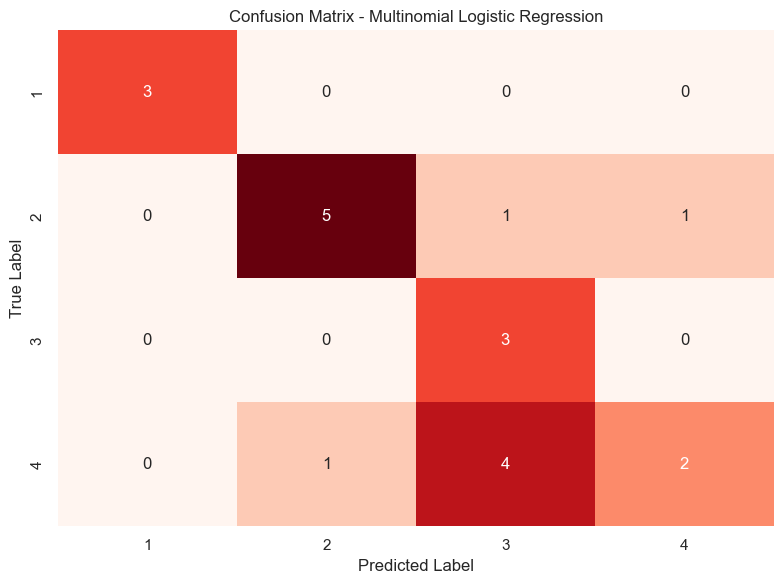

In [253]:
# Generate the confusion matrix using y_test and y_pred
conf_matrix = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

# Convert the confusion matrix to a DataFrame for labeled heatmap
conf_matrix_mlr = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plotting with red color map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlr, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.tight_layout()
plt.show()

02. DECISION TREES

Accuracy:  0.7
Precision:  0.789
Recall:  0.7
F1 Score:  0.701

Classification Report:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.71      0.83         7
           3       0.43      1.00      0.60         3
           4       0.75      0.43      0.55         7

    accuracy                           0.70        20
   macro avg       0.73      0.79      0.71        20
weighted avg       0.79      0.70      0.70        20



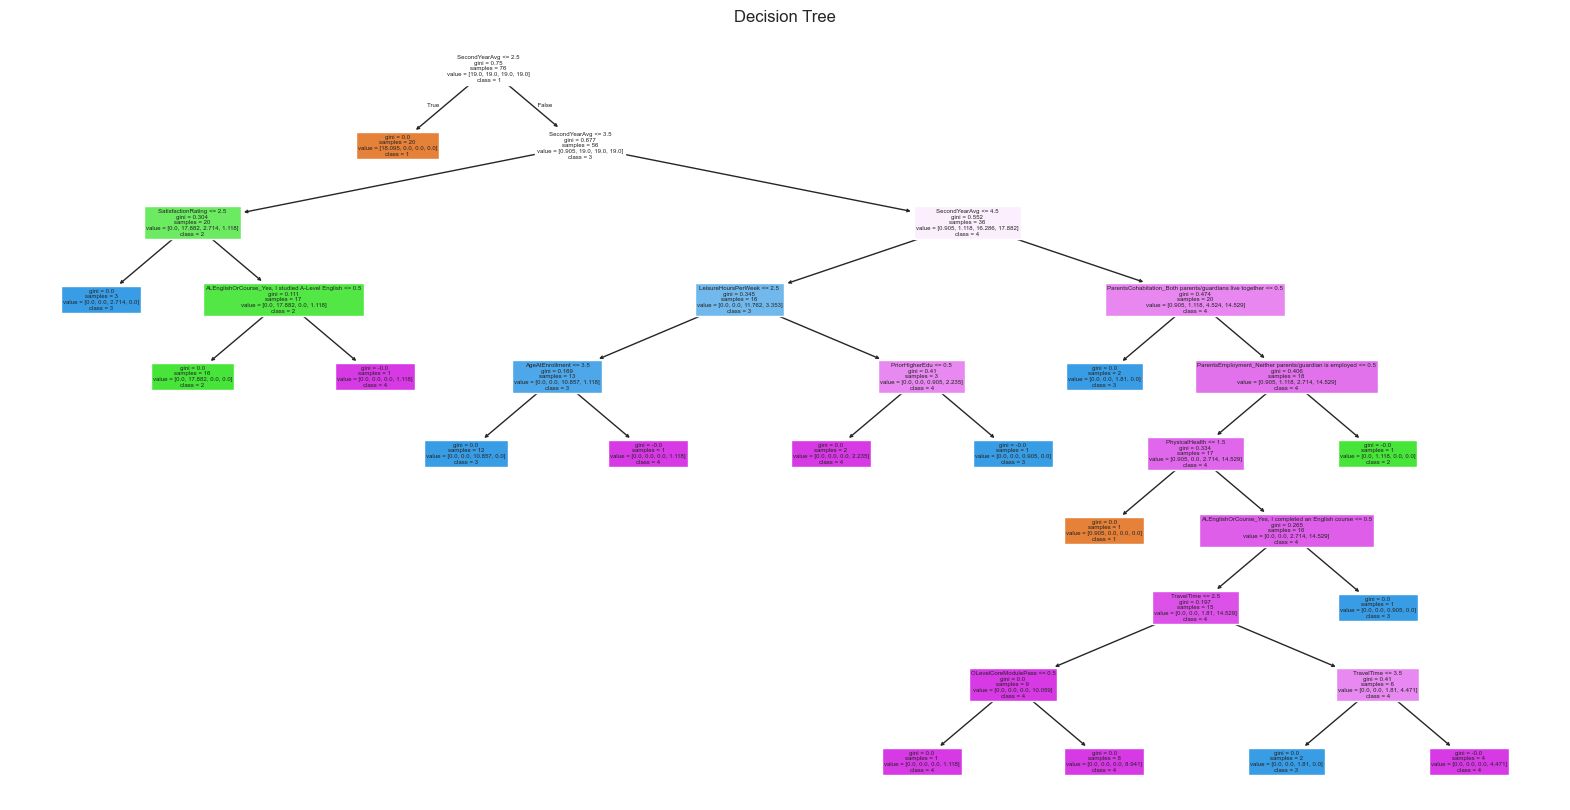

['decision_tree_model.pkl']

In [255]:
# Load the dataset from a CSV file
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate the input features (X) and the target variable (y)
X = FeatureSelectedDataFrame.drop('FinalClassification', axis=1)
y = FeatureSelectedDataFrame['FinalClassification']

# Split the data into training and testing sets (80% train, 20% test)
# Stratification is not applied here, but can be added if class imbalance exists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
# class_weight='balanced' compensates for any class imbalance
DecisionTrees = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DecisionTrees.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = DecisionTrees.predict(X_test)

# Compute evaluation metrics using weighted average to account for imbalanced classes
DTaccuracy = accuracy_score(y_test, y_pred)
DTprecision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
DTrecall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
DTf1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the evaluation results rounded to 3 decimal places
print("Accuracy: ", round(DTaccuracy, 3))
print("Precision: ", round(DTprecision, 3))
print("Recall: ", round(DTrecall, 3))
print("F1 Score: ", round(DTf1, 3))

# Optionally display a detailed classification report for more insights
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Visualize the trained Decision Tree for interpretability
plt.figure(figsize=(20, 10))
plot_tree(
    DecisionTrees,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True
)
plt.title("Decision Tree")
plt.show()

# Save the trained model
joblib.dump(DecisionTrees, 'decision_tree_model.pkl')

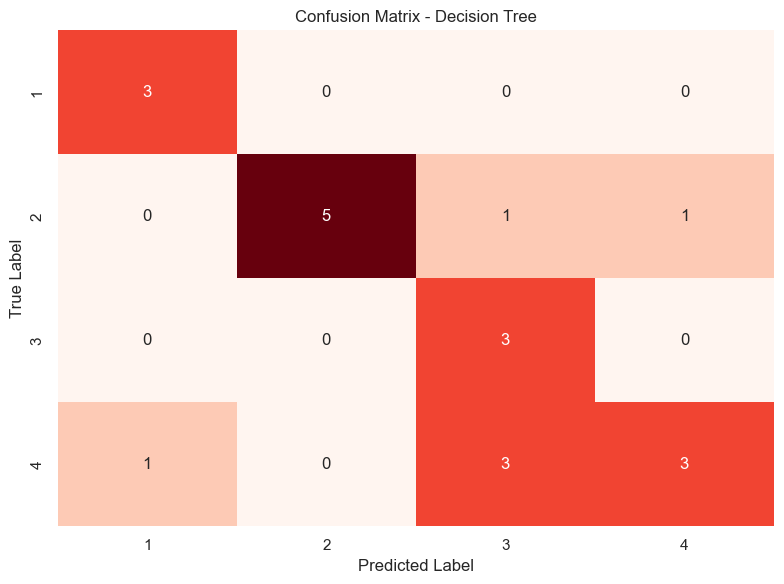

In [256]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Get class labels from y_test
labels_dt = sorted(y_test.unique())

# Convert to DataFrame for labeling
conf_matrix_df_dt = pd.DataFrame(conf_matrix_dt, index=labels_dt, columns=labels_dt)

# Plot the confusion matrix with red color map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_dt, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

03. RANDOM FOREST

In [258]:
# Load the dataset from CSV into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate the input features (X) and the target variable (y)
X = FeatureSelectedDataFrame.drop('FinalClassification', axis=1)  # All columns except the target
y = FeatureSelectedDataFrame['FinalClassification']               # Target column

# Split the data into training and testing sets (80 percent training, 20 percent testing), stratify=y ensures the class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize and train the Random Forest classifier
# n_estimators=100 defines the number of trees in the forest, class_weight='balanced' automatically adjusts weights to handle class imbalance
RandomForest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
RandomForest.fit(X_train, y_train)

# Generate predictions on the test set using the trained model
y_pred = RandomForest.predict(X_test)

# Compute classification performance metrics, Using weighted average ensures fair evaluation across imbalanced classes
RFaccuracy = accuracy_score(y_test, y_pred)
RFprecision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
RFrecall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
RFf1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the evaluation results rounded to 3 decimal places for readability
print("Accuracy: ", round(RFaccuracy, 3))
print("Precision: ", round(RFprecision, 3))
print("Recall: ", round(RFrecall, 3))
print("F1 Score: ", round(RFf1, 3))

# Save the trained model
joblib.dump(RandomForest, 'random_forest_model.pkl')

Accuracy:  0.9
Precision:  0.917
Recall:  0.9
F1 Score:  0.892


['random_forest_model.pkl']

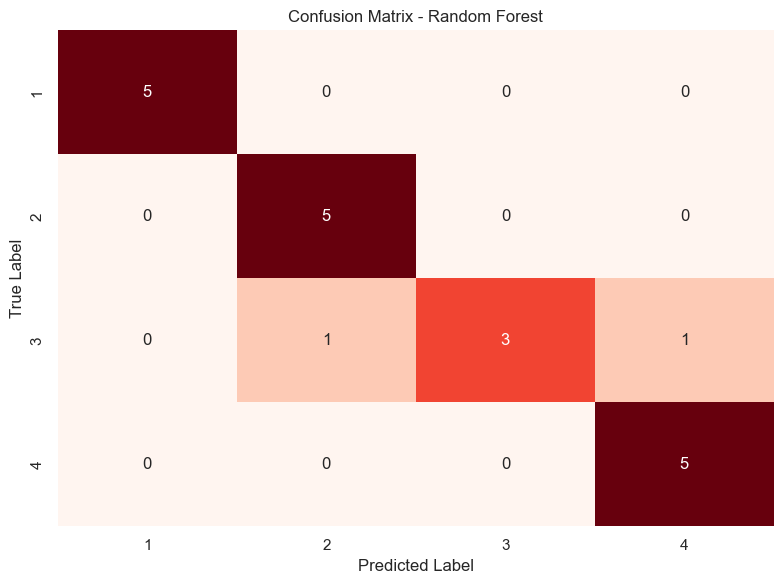

In [259]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Create labeled DataFrame
labels_rf = sorted(y_test.unique())
conf_matrix_df_rf = pd.DataFrame(conf_matrix_rf, index=labels_rf, columns=labels_rf)

# Plot confusion matrix in shades of red
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_rf, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

4. SUPPORT VECTOR MACHINES

In [261]:
# Load the dataset from a CSV file into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate input features (X) and target variable (y)
X = FeatureSelectedDataFrame.drop('FinalClassification', axis=1)  # Features only
y = FeatureSelectedDataFrame['FinalClassification']               # Target class

# Split the data into training and testing sets
# stratify=y ensures that the class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize the features to have zero mean and unit variance
# This is crucial for SVM performance, especially with RBF kernels
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)        # Only transform test data using same scaler

# Initialize and train the Support Vector Machine classifier
# Using RBF kernel for non-linear decision boundaries, class_weight='balanced' helps with class imbalance by adjusting weights automatically
# probability=True enables probability estimates (needed for ROC, SHAP, etc.)
SupportVectorMachines = SVC(kernel='linear', probability=True, random_state=42)
SupportVectorMachines.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = SupportVectorMachines.predict(X_test_scaled)

# Compute evaluation metrics using weighted averages to account for class imbalance
# zero_division=0 avoids errors if a metric calculation hits a division by zero
SVMaccuracy = accuracy_score(y_test, y_pred)
SVMprecision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
SVMrecall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
SVMf1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Display metrics rounded to 3 decimal places for clarity
print("Accuracy: ", round(SVMaccuracy, 3))
print("Precision: ", round(SVMprecision, 3))
print("Recall: ", round(SVMrecall, 3))
print("F1 Score: ", round(SVMf1, 3))

# Save the trained SVM model to disk using joblib for reuse or deployment
joblib.dump(SupportVectorMachines, 'svm_model.pkl')

Accuracy:  0.25
Precision:  0.096
Recall:  0.25
F1 Score:  0.139


C:\Users\Annmo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



['svm_model.pkl']

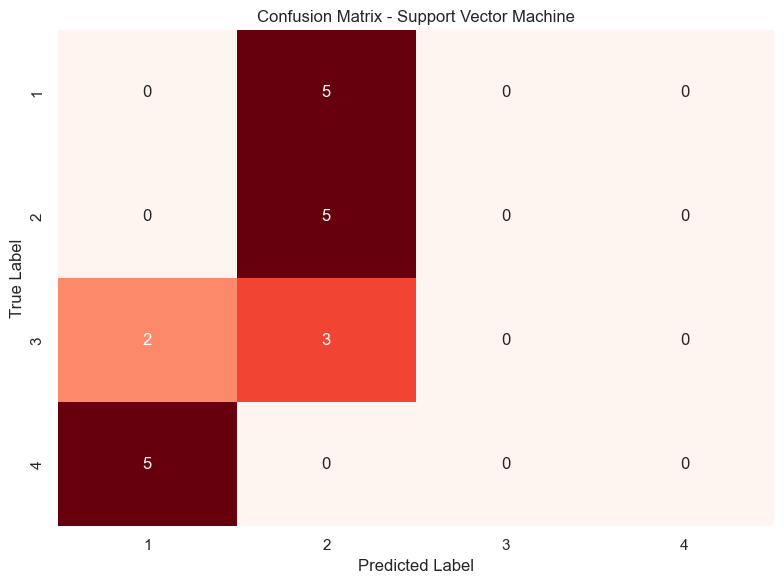

In [262]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Create labeled DataFrame
labels_svm = sorted(y_test.unique())
conf_matrix_df_svm = pd.DataFrame(conf_matrix_svm, index=labels_svm, columns=labels_svm)

# Plot confusion matrix in shades of red
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_svm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Support Vector Machine")
plt.tight_layout()
plt.show()

5. NAIVE BAYES

In [264]:
# Load the dataset from a CSV file into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate the input features (X) from the target variable (y)
X = FeatureSelectedDataFrame.drop("FinalClassification", axis=1)  # Feature columns
y = FeatureSelectedDataFrame["FinalClassification"]               # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
# random_state ensures that the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier, GaussianNB is used here assuming the features are continuous and normally distributed
NaiveBayes = GaussianNB()

# Train the Naive Bayes model on the training data
NaiveBayes.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = NaiveBayes.predict(X_test)

# Compute performance metrics using the actual and predicted labels, 'weighted' average accounts for class imbalance by weighting each class's contribution
NBaccuracy = accuracy_score(y_test, y_pred)
NBprecision = precision_score(y_test, y_pred, average='weighted')
NBrecall = recall_score(y_test, y_pred, average='weighted')
NBf1 = f1_score(y_test, y_pred, average='weighted')

# Display the results, formatted to two decimal places for readability
print(f"\nAccuracy: {NBaccuracy:.2f}")
print(f"Precision: {NBprecision:.2f}")
print(f"Recall: {NBrecall:.2f}")
print(f"F1-score: {NBf1:.2f}")

# Save the trained Naive Bayes model to disk using joblib for reuse or deployment
joblib.dump(NaiveBayes, 'naive_bayes_model.pkl')


Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1-score: 0.79


['naive_bayes_model.pkl']

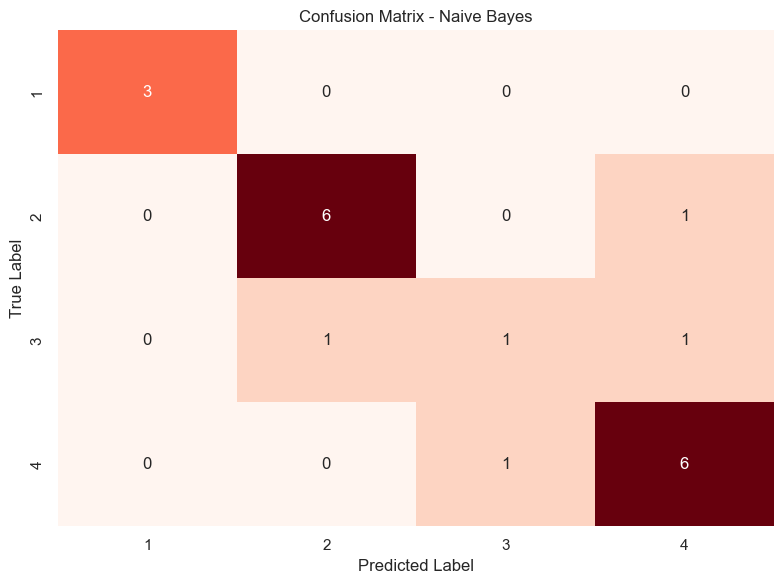

In [265]:
# Generate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)

# Get sorted class labels
labels_nb = sorted(y_test.unique())

# Convert to DataFrame for labeled heatmap
conf_matrix_df_nb = pd.DataFrame(conf_matrix_nb, index=labels_nb, columns=labels_nb)

# Plot confusion matrix in shades of red
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_nb, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

06. K-NEAREST NEIGHBORS

In [267]:
# Load the dataset from CSV into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Separate independent variables (features) and the dependent variable (target)
X = FeatureSelectedDataFrame.drop("FinalClassification", axis=1)  # All columns except target
y = FeatureSelectedDataFrame["FinalClassification"]               # Target variable

# Split the dataset into training and testing subsets (80% train, 20% test)
# Setting random_state ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K Nearest Neighbors classifier with k=5 neighbors, this value can be tuned based on validation performance
KNearestNeighbours = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model using the training data
KNearestNeighbours.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = KNearestNeighbours.predict(X_test)

# Evaluate performance using standard classification metrics
# Weighted average is used to handle class imbalance
KNNaccuracy = accuracy_score(y_test, y_pred)
KNNprecision = precision_score(y_test, y_pred, average='weighted')
KNNrecall = recall_score(y_test, y_pred, average='weighted')
KNNf1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics with two decimal places for clarity
print(f"\nAccuracy: {KNNaccuracy:.2f}")
print(f"Precision: {KNNprecision:.2f}")
print(f"Recall: {KNNrecall:.2f}")
print(f"F1-score: {KNNf1:.2f}")

# Save the trained K Nearest Neighbors model to disk using joblib for reuse or deployment
joblib.dump(KNearestNeighbours, 'k_nearest_neighbors_model.pkl')


Accuracy: 0.65
Precision: 0.82
Recall: 0.65
F1-score: 0.60


['k_nearest_neighbors_model.pkl']

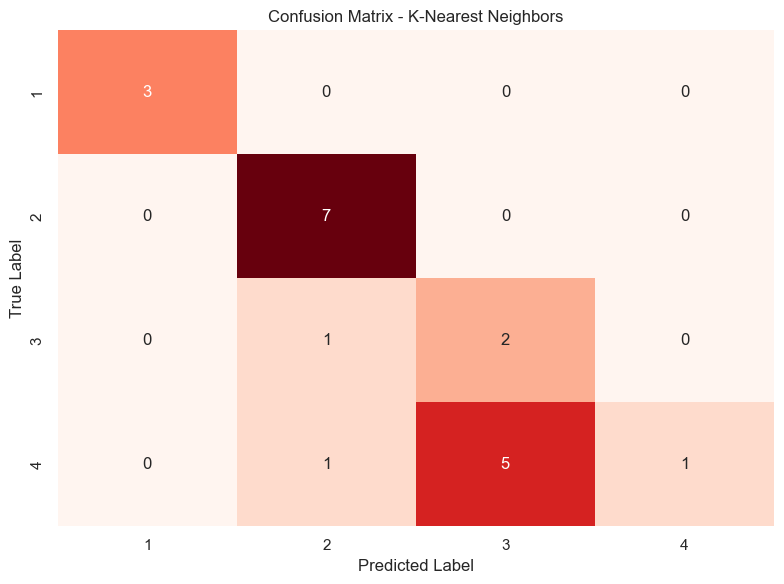

In [268]:
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Get sorted class labels
labels_knn = sorted(y_test.unique())

# Convert to DataFrame for labeled heatmap
conf_matrix_df_knn = pd.DataFrame(conf_matrix_knn, index=labels_knn, columns=labels_knn)

# Plot confusion matrix in shades of red
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_knn, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.tight_layout()
plt.show()

In [269]:
# Manually define the abbreviations of the models used
model_abbrevs = ['MLR', 'DT', 'RF', 'SVM', 'NB', 'KNN']

# Manually assign the evaluation metric values for each model
# These should be defined previously in the code (e.g., MLRaccuracy, DTprecision, etc.)
accuracies = [MLRaccuracy, DTaccuracy, RFaccuracy, SVMaccuracy, NBaccuracy, KNNaccuracy]
precisions = [MLRprecision, DTprecision, RFprecision, SVMprecision, NBprecision, KNNprecision]
recalls = [MLRrecall, DTrecall, RFrecall, SVMrecall, NBrecall, KNNrecall]
f1scores = [MLRf1, DTf1, RFf1, SVMf1, NBf1, KNNf1]

# Create a dictionary to map model abbreviations to their full descriptive names
model_name_map = {
    'MLR': 'Multinomial Logistic Regression',
    'DT': 'Decision Trees',
    'RF': 'Random Forest',
    'SVM': 'Support Vector Machine',
    'NB': 'Naive Bayes',
    'KNN': 'K Nearest Neighbors'
}

# Use the abbreviation list to build a list of full model names
model_names = [model_name_map[abbr] for abbr in model_abbrevs]

EvaluationMetricsDataFrame = pd.DataFrame({
    'ModelName': model_names,         # Full model name for readability
    'ModelAbbrev': model_abbrevs,     # Shortened model abbreviation
    'Accuracy': accuracies,           # Accuracy values for each model
    'Precision': precisions,          # Precision values for each model
    'Recall': recalls,                # Recall values for each model
    'F1Score': f1scores               # F1 Score values for each model
})

# Display the final DataFrame to confirm that values were assigned correctly
EvaluationMetricsDataFrame

,ModelName,ModelAbbrev,Accuracy,Precision,Recall,F1Score
0,Multinomial Logistic Regression,MLR,0.65,0.731250,0.65,0.641049
1,Decision Trees,DT,0.70,0.789286,0.70,0.701147
2,Random Forest,RF,0.90,0.916667,0.90,0.892045
3,Support Vector Machine,SVM,0.25,0.096154,0.25,0.138889
4,Naive Bayes,NB,0.80,0.787500,0.80,0.790000
5,K Nearest Neighbors,KNN,0.65,0.815079,0.65,0.603750


In [270]:
# Calculate the average of Accuracy, Precision, Recall, and F1 Score to form a single performance metric
EvaluationMetricsDataFrame['CombinedScore'] = EvaluationMetricsDataFrame[['Accuracy', 'Precision', 'Recall', 'F1Score']].mean(axis=1)

# Identify the index (row number) of the model with the highest CombinedScore
best_index = EvaluationMetricsDataFrame['CombinedScore'].idxmax()

# Retrieve the full row of the best-performing model using the identified index
best_model = EvaluationMetricsDataFrame.loc[best_index]

# Display the model name and all evaluation metrics in a clean, readable format
print("Best performing model based on average of all metrics:\n")
print(f"Model: {best_model['ModelName']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1 Score: {best_model['F1Score']:.4f}")
print(f"Combined Score: {best_model['CombinedScore']:.4f}")

Best performing model based on average of all metrics:

Model: Random Forest
Accuracy: 0.9000
Precision: 0.9167
Recall: 0.9000
F1 Score: 0.8920
Combined Score: 0.9022


In [271]:
# Calculate the average of Accuracy, Precision, Recall, and F1 Score to form a single performance metric
EvaluationMetricsDataFrame['CombinedScore'] = EvaluationMetricsDataFrame[['Accuracy', 'Precision', 'Recall', 'F1Score']].mean(axis=1)

# Sort the models by their CombinedScore in descending order so the best-performing ones appear first
sorted_df = EvaluationMetricsDataFrame.sort_values(by='CombinedScore', ascending=False).reset_index(drop=True)

# Retrieve the row corresponding to the second highest scoring model (ranked at index 1 after sorting)
second_best_model = sorted_df.loc[1]

# Print a clean summary of the second best model and its evaluation metrics
print("Second best performing model based on average of all metrics:\n")
print(f"Model: {second_best_model['ModelName']}")
print(f"Accuracy: {second_best_model['Accuracy']:.4f}")
print(f"Precision: {second_best_model['Precision']:.4f}")
print(f"Recall: {second_best_model['Recall']:.4f}")
print(f"F1 Score: {second_best_model['F1Score']:.4f}")
print(f"Combined Score: {second_best_model['CombinedScore']:.4f}")

Second best performing model based on average of all metrics:

Model: Naive Bayes
Accuracy: 0.8000
Precision: 0.7875
Recall: 0.8000
F1 Score: 0.7900
Combined Score: 0.7944


Aggregated SHAP

Aggregated SHAP for Decision Trees Classification Algorithm

In [274]:
# Load the trained Decision Tree model
DecisionTrees = joblib.load('decision_tree_model.pkl')

# Load dataset
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Drop the target variable to isolate features
SHAPDataFrame = FeatureSelectedDataFrame.drop('FinalClassification', axis=1)

# Create SHAP explainer for the Decision Tree model
explainer = shap.TreeExplainer(DecisionTrees)

# Compute SHAP values for all samples
shap_values = explainer.shap_values(SHAPDataFrame)

# Aggregate mean absolute SHAP values across classes or directly from the array
if isinstance(shap_values, list):
    mean_abs_per_class = [np.abs(class_shap).mean(axis=0) for class_shap in shap_values]
    mean_abs_shap = np.mean(mean_abs_per_class, axis=0)
else:
    mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))

# Sort features by importance
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_features = SHAPDataFrame.columns[sorted_idx]
sorted_importances = mean_abs_shap[sorted_idx]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Mean Absolute SHAP': sorted_importances
})
importance_df = importance_df[importance_df['Mean Absolute SHAP'] > 0]

# Create Plotly bar chart
fig = px.bar(
    importance_df,
    x='Mean Absolute SHAP',
    y='Feature',
    orientation='h',
    title='Global Feature Importance (Decision Tree SHAP)',
    labels={'Mean Absolute SHAP': 'Mean Absolute SHAP Value'},
    height=1600,
    color_discrete_sequence=['red']
)

# Reverse Y-axis and force all ticks
fig.update_layout(yaxis={'autorange': 'reversed'})
fig.update_yaxes(tickmode='linear')

# Save the interactive chart
fig.write_html("shap_feature_importance_decision_tree.html")
print("Interactive SHAP feature importance saved as shap_feature_importance_decision_tree.html")

Interactive SHAP feature importance saved as shap_feature_importance_decision_tree.html


Aggregated SHAP for Random Forest Classification Algorithm

In [276]:
# Load the trained Decision Tree model
RandomForest = joblib.load('random_forest_model.pkl')

# Load full dataset from a CSV file into a DataFrame
FeatureSelectedDataFrame = pd.read_csv("C:/Users/Annmo/Downloads/FeatureSelectedDataFrame.csv")

# Drop the target variable 'FinalClassification' to create a DataFrame containing only features
SHAPDataFrame = FeatureSelectedDataFrame.drop('FinalClassification', axis=1)

# Create a SHAP explainer using the trained Random Forest model
explainer = shap.TreeExplainer(RandomForest)

# Compute SHAP values for all samples in the dataset
shap_values = explainer.shap_values(SHAPDataFrame)

# If SHAP values are returned as a list (one array per class), compute the mean absolute SHAP values
if isinstance(shap_values, list):
    mean_abs_per_class = [np.abs(class_shap).mean(axis=0) for class_shap in shap_values]
    mean_abs_shap = np.mean(mean_abs_per_class, axis=0)
else:
    mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))

# Sort features by descending order of mean absolute SHAP values
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_features = SHAPDataFrame.columns[sorted_idx]
sorted_importances = mean_abs_shap[sorted_idx]

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Mean Absolute SHAP': sorted_importances
})

# Remove features with zero SHAP importance
importance_df = importance_df[importance_df['Mean Absolute SHAP'] > 0]

# Create Plotly bar chart
fig = px.bar(
    importance_df,
    x='Mean Absolute SHAP',
    y='Feature',
    orientation='h',
    title='Global Feature Importance (Random Forest SHAP)',
    labels={'Mean Absolute SHAP': 'Mean Absolute SHAP Value'},
    height=1600,
    color_discrete_sequence=['red']
)

fig.update_layout(yaxis={'autorange': 'reversed'})
fig.update_yaxes(tickmode='linear')

# Save interactive plot
fig.write_html("shap_feature_importance_random_forest.html")

# Confirm completion
print("Interactive SHAP feature importance saved as shap_feature_importance_random_forest.html")

Interactive SHAP feature importance saved as shap_feature_importance_random_forest.html


Permutation Score Calculation

01. Permutation Importance for Multinomial Logistic Regression Classifier

In [279]:
# Measure feature importance by shuffling each column and observing accuracy drop
PermutationResult = permutation_importance(
    MultinomialLogisticRegression,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Build DataFrame of mean and std importance for each feature
PermutationImportanceDataFrame = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResult.importances_mean,
    "StandardDeviation": PermutationResult.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Display sorted feature importances
print("\nPermutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrame.to_string(index=False))


Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                                                Inflation Rate Percentage Point Change        0.078333           0.047755
                                                                         SecondYearAvg        0.075000           0.049582
                                                                       HouseholdIncome        0.040000           0.039581
                                                                        PhysicalHealth        0.033333           0.061010
                                                 Exchange Rate Percentage Point Change        0.028333           0.066687
                       SyllabusMedium_Local Government Syllabus (Sri Lankan : English)        0.023333           0.024944
                                                                            TravelTim

02. Permutation Importance for Decision Tree Classifier

In [281]:
# Measure feature importance for decision tree by shuffling each column and checking accuracy drop
PermutationResultDT = permutation_importance(
    DecisionTrees,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Create DataFrame with mean and std importance per feature
PermutationImportanceDataFrameDT = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResultDT.importances_mean,
    "StandardDeviation": PermutationResultDT.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Show ranked feature importances for decision tree
print("\nDecision Tree Permutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrameDT.to_string(index=False))


Decision Tree Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                                                                         SecondYearAvg        0.375000           0.088270
                                                                    SatisfactionRating        0.050000           0.034157
                                      ALEnglishOrCourse_Yes, I studied A-Level English        0.031667           0.043748
                                  ALEnglishOrCourse_Yes, I completed an English course        0.025000           0.028137
                                                                        PhysicalHealth        0.025000           0.028137
                                                                            TravelTime        0.011667           0.024777
                                ParentsEmployment_Neither parents/guard

03. Permutation Importance for Random Forest Classifier

In [283]:
# Measure feature importance for random forest by shuffling each column and checking accuracy drop
PermutationResultRF = permutation_importance(
    RandomForest,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Create DataFrame with mean and std importance per feature
PermutationImportanceDataFrameRF = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResultRF.importances_mean,
    "StandardDeviation": PermutationResultRF.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Show ranked feature importances for random forest
print("\nRandom Forest Permutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrameRF.to_string(index=False))


Random Forest Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                                                                       AgeAtEnrollment             0.0                0.0
                                  ALEnglishOrCourse_Yes, I completed an English course             0.0                0.0
                                      ALEnglishOrCourse_Yes, I studied A-Level English             0.0                0.0
                                 ParentsEmployment_Both parents/guardians are employed             0.0                0.0
                                ParentsEmployment_Neither parents/guardian is employed             0.0                0.0
                                     ParentsEmployment_One parent/guardian is employed             0.0                0.0
                                                    ParentsEducation_Co

04. Permutation Importance for Support Vector Machine Classifier

In [285]:
# Measure feature importance for support vector machine by shuffling each column and checking accuracy drop
PermutationResultSVM = permutation_importance(
    SupportVectorMachines,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Create DataFrame with mean and std importance per feature
PermutationImportanceDataFrameSVM = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResultSVM.importances_mean,
    "StandardDeviation": PermutationResultSVM.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Show ranked feature importances for support vector machine
print("\nSupport Vector Machine Permutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrameSVM.to_string(index=False))


Support Vector Machine Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                                                                         SecondYearAvg        0.136667           0.072954
                                                                        PhysicalHealth        0.068333           0.037602
                                             Unemployment Rate Percentage Point Change        0.065000           0.036856
                       SyllabusMedium_Local Government Syllabus (Sri Lankan : Sinhala)        0.048333           0.032872
                                                                  SyllabusMedium_Other        0.048333           0.008975
                                                                    SatisfactionRating        0.023333           0.028087
                                                 Exchange Rate

05. Permutation Importance for Naive Bayes Classifier

In [287]:
# Measure feature importance for naive bayes by shuffling each column and checking accuracy drop
PermutationResultNaiveBayes = permutation_importance(
    NaiveBayes,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Create DataFrame with mean and std importance per feature
PermutationImportanceDataFrameNaiveBayes = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResultNaiveBayes.importances_mean,
    "StandardDeviation": PermutationResultNaiveBayes.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Show ranked feature importances for naive bayes
print("\nNaive Bayes Permutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrameNaiveBayes.to_string(index=False))


Naive Bayes Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                       SyllabusMedium_Local Government Syllabus (Sri Lankan : English)        0.183333           0.058214
                      ParentsEducation_Higher education (Diploma or Bachelor's degree)        0.160000           0.058310
                                  ALEnglishOrCourse_Yes, I completed an English course        0.126667           0.060185
                                                                       DailyScreenTime        0.126667           0.030912
                                        EmployedDuringDegree_Yes, part-time employment        0.080000           0.043970
                                                                            TravelTime        0.075000           0.049582
                   ParentsEducation_Postgraduate education (Master's degr

06. Permutation Importance for K Nearest Neighbors Classifier

In [289]:
# Measure feature importance for k nearest neighbors by shuffling each column and checking accuracy drop
PermutationResultKNN = permutation_importance(
    KNearestNeighbours,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Create DataFrame with mean and std importance per feature
PermutationImportanceDataFrameKNN = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanImportance": PermutationResultKNN.importances_mean,
    "StandardDeviation": PermutationResultKNN.importances_std
}).sort_values(by="MeanImportance", ascending=False)

# Show ranked feature importances for k nearest neighbors
print("\nK Nearest Neighbors Permutation Feature Importance (sorted by mean importance):")
print(PermutationImportanceDataFrameKNN.to_string(index=False))


K Nearest Neighbors Permutation Feature Importance (sorted by mean importance):
                                                                               Feature  MeanImportance  StandardDeviation
                                                 Exchange Rate Percentage Point Change        0.186667           0.075203
                                                                            TravelTime        0.031667           0.032872
                                                                        PhysicalHealth        0.016667           0.026874
                                                                         SecondYearAvg        0.008333           0.029107
                                                                       HouseholdIncome        0.006667           0.035901
                                             Unemployment Rate Percentage Point Change        0.000000           0.000000
                               ParentsCohabitation_Both parents/g

Evaluation of Permutation Importance Score

In [291]:
# Create a dictionary to store top 3 features for each model
TopFeaturesByModel = {
    "LogisticRegression": PermutationImportanceDataFrame.head(3)["Feature"].tolist(),
    "DecisionTree": PermutationImportanceDataFrameDT.head(3)["Feature"].tolist(),
    "RandomForest": PermutationImportanceDataFrameRF.head(3)["Feature"].tolist(),
    "SupportVectorMachine": PermutationImportanceDataFrameSVM.head(3)["Feature"].tolist(),
    "NaiveBayes": PermutationImportanceDataFrameNaiveBayes.head(3)["Feature"].tolist(),
    "KNearestNeighbors": PermutationImportanceDataFrameKNN.head(3)["Feature"].tolist()
}

# Convert to a summary table with custom column names
TopFeaturesTable = pd.DataFrame.from_dict(
    TopFeaturesByModel,
    orient="index",
    columns=["1", "2", "3"]
)

# Display the transposed version for easier comparison across models
print("\nTop 3 Features by Model:")
TopFeaturesTable


Top 3 Features by Model:


,1,2,3
LogisticRegression,Inflation Rate Percentage Point Change,SecondYearAvg,HouseholdIncome
DecisionTree,SecondYearAvg,SatisfactionRating,"ALEnglishOrCourse_Yes, I studied A-Level English"
RandomForest,AgeAtEnrollment,"ALEnglishOrCourse_Yes, I completed an English ...","ALEnglishOrCourse_Yes, I studied A-Level English"
SupportVectorMachine,SecondYearAvg,PhysicalHealth,Unemployment Rate Percentage Point Change
NaiveBayes,SyllabusMedium_Local Government Syllabus (Sri ...,ParentsEducation_Higher education (Diploma or ...,"ALEnglishOrCourse_Yes, I completed an English ..."
KNearestNeighbors,Exchange Rate Percentage Point Change,TravelTime,PhysicalHealth
